# Análisis y modelamiento del churn en fintech

| #  | Categoría          | Variable                       | Fuente Original          | Presente en Dataset    | Tipo                | Descripción                                                                   |
| -- | ------------------ | ------------------------------ | ------------------------ | ---------------------- | ------------------- | ----------------------------------------------------------------------------- |
| 1  | Perfil del Cliente | `CustomerId`                   | Dataset Churn            | Dataset Consolidado    | Categórica Nominal  | Identificador único del cliente                                               |
| 2  | Perfil del Cliente | `CreditScore`                  | Dataset Churn            | Dataset Consolidado    | Numérica Discreta   | Score crediticio del cliente                                                  |
| 3  | Perfil del Cliente | `Geography`                    | Dataset Churn            | Dataset Consolidado    | Categórica Discreta | País de residencia del cliente                                                |
| 4  | Perfil del Cliente | `Gender`                       | Dataset Churn            | Dataset Consolidado    | Categórica Binaria  | Género del cliente                                                            |
| 5  | Perfil del Cliente | `Age`                          | Dataset Churn            | Dataset Consolidado    | Numérica Discreta   | Edad del cliente                                                              |
| 6  | Perfil del Cliente | `Tenure`                       | Dataset Churn            | Dataset Consolidado    | Numérica Discreta   | Antigüedad del cliente                                                        |
| 7  | Perfil del Cliente | `Balance`                      | Dataset Churn            | Dataset Consolidado    | Numérica Continua   | Balance del cliente                                                           |
| 8  | Perfil del Cliente | `NumOfProducts`                | Dataset Churn            | Dataset Consolidado    | Numérica Discreta   | Número de productos del cliente                                               |
| 9  | Perfil del Cliente | `HasCrCard`                    | Dataset Churn            | Dataset Consolidado    | Categórica Binaria  | Posee tarjeta de crédito                                                      |
| 10 | Perfil del Cliente | `IsActiveMember`               | Dataset Churn            | Dataset Consolidado    | Categórica Binaria  | Cliente activo o pasivo                                                       |
| 11 | Perfil del Cliente | `EstimatedSalary`              | Dataset Churn            | Dataset Consolidado    | Numérica Continua   | Salario estimado                                                              |
| 12 | Transacciones      | `days_since_last_tx`           | Dataset Paysim           | Dataset Consolidado    | Numérica Discreta   | Días desde la última transacción                                              |
| 13 | Transacciones      | `txs_avg_amount`               | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | Monto promedio de transacción                                                 |
| 14 | Transacciones      | `amount_std`                   | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | Desviación estándar de montos                                                 |
| 15 | Transacciones      | `avg_cashout_amount`           | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | Monto promedio de retiro                                                      |
| 16 | Transacciones      | `ratio_recent_vs_past_txs`     | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | log(Transacciones_últimos30d / Transacciones_anteriores60d)                   |
| 17 | Transacciones      | `ratio_recent_vs_past_amount`  | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | log(Monto_últimos30d / Monto_anteriores60d)                                   |
| 18 | Transacciones      | `ratio_cashouts`               | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | log(CASH_OUT / TotalTransacciones)                                            |
| 19 | Transacciones      | `ratio_transfers`              | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | log(TRANSFER / TotalTransacciones)                                            |
| 20 | Transacciones      | `inflation_pressure`           | Dataset Paysim           | Dataset Consolidado    | Numérica Continua   | (1 - ratio_recent_vs_hist_txs_amount) * (vulnerability_score * avg_inflation) |
| 21 | App                | `days_since_last_ss`           | Generado artificialmente | Dataset Consolidado    | Numérica Discreta   | Días desde el último login                                                    |
| 22 | App                | `total_ss_past30d`             | Generado artificialmente | Dataset Consolidado    | Numérica Discreta   | Logins últimos 30 días                                                        |
| 23 | App                | `total_ss_past90d`             | Generado artificialmente | Dataset Consolidado    | Numérica Discreta   | Logins últimos 90 días                                                        |
| 24 | App                | `avg_ss_per_wk`                | Generado artificialmente | Dataset Consolidado    | Numérica Continua   | Logins promedio por semana                                                    |
| 25 | App                | `avg_ss_duration_min`          | Generado artificialmente | Dataset Consolidado    | Numérica Continua   | Duración promedio de sesiones (min)                                           |
| 26 | App                | `std_ss_duration_min`          | Generado artificialmente | Dataset Consolidado    | Numérica Continua   | Desviación estándar de duración                                               |
| 27 | App                | `ratio_ss_time_recent_vs_past` | Generado artificialmente | Dataset Consolidado    | Numérica Continua   | log(Duración30d / Duración60dPrevios)                                         |
| 28 | App                | `ratio_events_sessios`         | Generado artificialmente | Dataset Consolidado    | Numérica Continua   | log(FuncionalidadesUsadas / TotalLogins)                                      |
| 29 | App                | `ratio_failed_ss`              | Generado artificialmente | Dataset Consolidado    | Numérica Continua   | log(LoginsFallidos / TotalLogins)                                             |
| 30 | App                | `total_opened_push`            | Generado artificialmente | Dataset Consolidado    | Numérica Discreta   | Total de notificaciones abiertas                                              |
| 31 | Objetivo           | `Churn`                        | Datasets combinados      | Dataset Consolidado    | Categórica Binaria  | Variable objetivo (abandono)                                                  |
| 32 | Otros              | `avg_inflation`                | Factor Externo           | Notebook Consolidation | Numérica Continua   | Inflación promedio del período                                                |
| 33 | Otros              | `vulnerability_score`          | Factor Externo           | Notebook Consolidation | Numérica Discreta   | Escala de vulnerabilidad (1–3)                                                |
| 34 | Otros              | `risk_factor`                  | Factor Externo           | Notebook Consolidation | Numérica Continua   | vulnerability_score * avg_inflation                                           |


## 1. inicialización

In [22]:
""" instala librerias necesarias.
"""
%pip install numpy pandas matplotlib seaborn scikit-learn
%pip install --upgrade scikit-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1.1 Ajustes iniciales

In [23]:
%pip install plotly

""" importa librerias instaladas.
- train test split: para visualizacion 

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score



from xgboost import XGBClassifier




Note: you may need to restart the kernel to use updated packages.


### 1.2 Ajustes gráficos

In [24]:
%matplotlib inline
# Establece el estilo de gráficos, recordar probar igual el (bmh)
plt.style.use('ggplot')
sns.set(style='whitegrid')

### 1.3 Carga y Preprocesamiento del Dataset

In [25]:
df = pd.read_csv('/Users/patri/Documents/GitHub/velarion_fintech/velarion_fintech-main/src/dataset_churn.csv')
pd.concat([df.head(7), df.tail(7)])


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,total_ss_past30d,total_ss_past90d,avg_ss_per_wk,avg_ss_duration_min,std_ss_duration_min,ratio_ss_time_recent_vs_past,ratio_events_sessios,ratio_failed_ss,total_opened_push,Churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,...,1,2,0.458333,18.230805,14.026740,0.699703,-1.386294,-2.484907,2,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,...,0,15,1.238095,22.245788,20.961316,-1.855429,-1.686399,-3.295837,8,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,...,5,22,2.038462,32.271163,28.065546,-0.296098,-0.325422,-3.988984,18,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,...,2,3,0.347826,9.090539,4.638817,0.431595,-0.810930,-2.197225,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,...,8,13,0.923077,21.021590,14.791833,1.297259,-1.139434,-3.218876,1,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,...,5,22,2.269231,29.997109,28.770396,-0.572889,-0.483427,-4.094345,25,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,...,7,19,1.653846,19.612479,19.452702,-0.153568,-1.219240,-2.397895,0,0
9448,15569266,644,France,Male,28,7,155060.41,1,1,0,...,0,8,0.631579,7.157100,5.056498,-0.687221,-1.466337,-1.871802,0,0
9449,15719294,800,France,Female,29,2,0.00,2,0,0,...,2,11,0.826087,14.733741,14.028555,-0.567997,-1.609438,-2.995732,3,0
9450,15606229,771,France,Male,39,5,0.00,2,1,0,...,3,15,1.160000,11.255403,7.978249,-0.557856,-1.791759,-2.302585,8,0


#### 1.3.1 Limpieza preliminar

In [26]:
df.info()
# se observa que no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9455 entries, 0 to 9454
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerId                    9455 non-null   int64  
 1   CreditScore                   9455 non-null   int64  
 2   Geography                     9455 non-null   object 
 3   Gender                        9455 non-null   object 
 4   Age                           9455 non-null   int64  
 5   Tenure                        9455 non-null   int64  
 6   Balance                       9455 non-null   float64
 7   NumOfProducts                 9455 non-null   int64  
 8   HasCrCard                     9455 non-null   int64  
 9   IsActiveMember                9455 non-null   int64  
 10  EstimatedSalary               9455 non-null   float64
 11  days_since_last_tx            9455 non-null   int64  
 12  txs_avg_amount                9455 non-null   float64
 13  amo

#### 1.3.1 Limpieza nulos

In [27]:
df.isnull().sum()
#Comprobamos que no hay datos nulos en el dataset

CustomerId                      0
CreditScore                     0
Geography                       0
Gender                          0
Age                             0
Tenure                          0
Balance                         0
NumOfProducts                   0
HasCrCard                       0
IsActiveMember                  0
EstimatedSalary                 0
days_since_last_tx              0
txs_avg_amount                  0
amount_std                      0
avg_cashout_amount              0
ratio_recent_vs_past_txs        0
ratio_recent_vs_past_amount     0
ratio_cashouts                  0
ratio_transfers                 0
inflation_pressure              0
days_since_last_ss              0
total_ss_past30d                0
total_ss_past90d                0
avg_ss_per_wk                   0
avg_ss_duration_min             0
std_ss_duration_min             0
ratio_ss_time_recent_vs_past    0
ratio_events_sessios            0
ratio_failed_ss                 0
total_opened_p

In [28]:
df[df.duplicated()]
#No hay datos duplicados en el dataset

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,total_ss_past30d,total_ss_past90d,avg_ss_per_wk,avg_ss_duration_min,std_ss_duration_min,ratio_ss_time_recent_vs_past,ratio_events_sessios,ratio_failed_ss,total_opened_push,Churn


## 2. Análisis exploratorio de datos (EDA) DATASET crudo


| Métrica   | Qué mide                     | Interpretación                                                                          |
| --------- | ---------------------------- | --------------------------------------------------------------------------------------- |
| **count** | Cantidad de valores no nulos | Te dice cuántos datos hay disponibles (útil para ver si hay *NaN* o valores faltantes). |
| **mean**  | Media (promedio)             | Valor promedio de la columna.                                                           |
| **std**   | Desviación estándar          | Cuánto varían los datos respecto al promedio (más alto = más dispersión).               |
| **min**   | Mínimo                       | El valor más bajo encontrado.                                                           |
| **25%**   | Primer cuartil (Q1)          | El 25% de los valores son menores o iguales a este número.                              |
| **50%**   | Mediana (Q2)                 | El 50% de los valores son menores o iguales a este número (valor central).              |
| **75%**   | Tercer cuartil (Q3)          | El 75% de los valores son menores o iguales a este número.                              |
| **max**   | Máximo                       | El valor más alto encontrado.                                                           |


In [29]:
df.describe()
#proporciona un resumen estadístico de las columnas numéricas del Dataset de Velarion (29 columnas numéricas)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,days_since_last_tx,...,total_ss_past30d,total_ss_past90d,avg_ss_per_wk,avg_ss_duration_min,std_ss_duration_min,ratio_ss_time_recent_vs_past,ratio_events_sessios,ratio_failed_ss,total_opened_push,Churn
count,9.455000e+03,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,...,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000
mean,1.569090e+07,650.425172,38.773876,5.204865,76109.321277,1.534638,0.707668,0.516341,99923.902911,4.251930,...,4.024114,12.315600,1.069846,17.099095,14.323000,-0.080843,-1.423116,-2.833293,4.812057,0.187308
std,7.185059e+04,96.714779,10.472589,2.771805,62452.574330,0.578181,0.454858,0.499759,57472.067596,14.692454,...,3.046368,7.184285,0.508797,6.425723,8.167456,0.577975,0.532006,0.559578,5.445977,0.390179
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.931724,-3.433987,-4.691348,0.000000,0.000000
25%,1.562882e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50942.005000,1.000000,...,2.000000,7.000000,0.750000,12.106667,8.173783,-0.443942,-1.749200,-3.218876,2.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,96834.780000,1.000000,1.000000,1.000000,99828.450000,1.000000,...,4.000000,11.000000,1.000000,16.694503,12.740335,-0.060480,-1.386294,-2.833213,3.000000,0.000000
75%,1.575291e+07,718.000000,44.000000,8.000000,127460.850000,2.000000,1.000000,1.000000,149054.960000,3.000000,...,6.000000,16.000000,1.272727,20.863989,18.602375,0.292571,-1.098612,-2.442347,6.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,180.000000,...,23.000000,57.000000,4.153846,50.745256,51.139572,2.920430,0.000000,-0.693147,43.000000,1.000000


In [30]:
df.describe(include='all')
#proporciona un resumen estadístico de todas las columnas, incluyendo las categóricas (Geography, Gender ) (total 31 columnas, 29 numéricas y 2 categóricas)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,total_ss_past30d,total_ss_past90d,avg_ss_per_wk,avg_ss_duration_min,std_ss_duration_min,ratio_ss_time_recent_vs_past,ratio_events_sessios,ratio_failed_ss,total_opened_push,Churn
count,9.455000e+03,9455.000000,9455,9455,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,...,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4755,5192,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569090e+07,650.425172,NaN,NaN,38.773876,5.204865,76109.321277,1.534638,0.707668,0.516341,...,4.024114,12.315600,1.069846,17.099095,14.323000,-0.080843,-1.423116,-2.833293,4.812057,0.187308
std,7.185059e+04,96.714779,NaN,NaN,10.472589,2.771805,62452.574330,0.578181,0.454858,0.499759,...,3.046368,7.184285,0.508797,6.425723,8.167456,0.577975,0.532006,0.559578,5.445977,0.390179
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.931724,-3.433987,-4.691348,0.000000,0.000000
25%,1.562882e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,7.000000,0.750000,12.106667,8.173783,-0.443942,-1.749200,-3.218876,2.000000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,96834.780000,1.000000,1.000000,1.000000,...,4.000000,11.000000,1.000000,16.694503,12.740335,-0.060480,-1.386294,-2.833213,3.000000,0.000000
75%,1.575291e+07,718.000000,NaN,NaN,44.000000,8.000000,127460.850000,2.000000,1.000000,1.000000,...,6.000000,16.000000,1.272727,20.863989,18.602375,0.292571,-1.098612,-2.442347,6.000000,0.000000


In [31]:
""" Es necesario hacer un preprocesamiento de los datos, ya que hay variables categóricas y numéricas y las categoricas seran un problema para modelos de ML"""


' Es necesario hacer un preprocesamiento de los datos, ya que hay variables categóricas y numéricas y las categoricas seran un problema para modelos de ML'

In [32]:
info_cat = pd.DataFrame({
    'tipo_dato': df.dtypes,
    'nulos': df.isnull().sum(),
    'unicos': df.nunique(),
})

#clasificación simple
def clasificar_variable(col):
    tipo = df[col].dtype
    n_unicos = df[col].nunique()
    
    if tipo == 'bool':
        return 'Booleana'
    elif tipo == 'object' or tipo.name == 'category':
        if n_unicos < 10:
            return 'Categórica Nominal'
        elif n_unicos < 50:
            return 'Categórica Ordinal / Baja cardinalidad'
        else:
            return 'Texto libre / Alta cardinalidad'
    else:
        return 'Numérica'

info_cat['tipo_variable'] = [clasificar_variable(c) for c in df.columns]

info_cat


,tipo_dato,nulos,unicos,tipo_variable
CustomerId,int64,0,9455,Numérica
CreditScore,int64,0,458,Numérica
Geography,object,0,3,Categórica Nominal
Gender,object,0,2,Categórica Nominal
Age,int64,0,70,Numérica
Tenure,int64,0,11,Numérica
Balance,float64,0,6005,Numérica
NumOfProducts,int64,0,4,Numérica
HasCrCard,int64,0,2,Numérica
IsActiveMember,int64,0,2,Numérica


In [33]:
#catálogo de variables

#DataFrame nuevo para consultar variables
df_cat_var = pd.DataFrame({
    'Feature': df.columns,
    'tipo_dato': df.dtypes.astype(str),
    'unicos': df.nunique()
})

#clasificación automática de tipo de variable
def clasificar_variable(col):
    tipo = df[col].dtype
    n_unicos = df[col].nunique()
    
    if tipo == 'bool' or n_unicos == 2:
        return 'Categórica Binaria'
    elif tipo == 'object' or tipo.name == 'category':
        if n_unicos < 10:
            return 'Categórica Nominal'
        elif n_unicos < 50:
            return 'Categórica Ordinal / Baja cardinalidad'
        else:
            return 'Texto libre / Alta cardinalidad'
    else:
        return 'Numérica'

df_cat_var['tipo_variable'] = [clasificar_variable(c) for c in df.columns]

#diccionario de descripciones funcionales
descripciones = {
    # Perfil del cliente
    'CustomerId': 'Identificador único del cliente.',
    'CreditScore': 'Puntaje crediticio que mide la solvencia del cliente.',
    'Geography': 'País de residencia del cliente.',
    'Gender': 'Género declarado del cliente (Male/Female).',
    'Age': 'Edad actual del cliente.',
    'Tenure': 'Antigüedad en años como cliente del banco.',
    'Balance': 'Monto actual del saldo en la cuenta bancaria.',
    'NumOfProducts': 'Número de productos financieros que el cliente posee (cuentas, tarjetas, préstamos).',
    'HasCrCard': 'Indica si el cliente tiene una tarjeta de crédito (1=Sí, 0=No).',
    'IsActiveMember': 'Estado de actividad del cliente (1=Activo, 0=Inactivo).',
    'EstimatedSalary': 'Ingreso estimado mensual del cliente en moneda local.',

    #transacciones
    'days_since_last_tx': 'Días transcurridos desde la última transacción realizada.',
    'txs_avg_amount': 'Monto promedio de las transacciones del cliente.',
    'amount_std': 'Desviación estándar de los montos de transacción, indica variabilidad en los importes.',
    'avg_cashout_amount': 'Monto promedio de retiro de dinero (cash-out) por transacción.',
    'ratio_recent_vs_past_txs': 'Logaritmo del ratio entre número de transacciones recientes (últimos 30 días) y pasadas (60 días anteriores).',
    'ratio_recent_vs_past_amount': 'Logaritmo del ratio entre montos transaccionados en los últimos 30 días frente a los 60 días previos.',
    'ratio_cashouts': 'Logaritmo del ratio entre cantidad de retiros (cash-outs) y total de transacciones.',
    'ratio_transfers': 'Logaritmo del ratio entre cantidad de transferencias y total de transacciones.',
    'inflation_pressure': 'Índice de vulnerabilidad del cliente ante la inflación del país de residencia.',

    #interacción con la app
    'days_since_last_ss': 'Días desde el último inicio de sesión en la aplicación bancaria.',
    'total_ss_past30d': 'Cantidad de logins en los últimos 30 días.',
    'total_ss_past90d': 'Cantidad de logins en los últimos 90 días.',
    'avg_ss_per_wk': 'Promedio de logins por semana.',
    'avg_ss_duration_min': 'Duración promedio (en minutos) de las sesiones iniciadas.',
    'std_ss_duration_min': 'Desviación estándar de la duración de las sesiones, mide variabilidad en uso.',
    'ratio_ss_time_recent_vs_past': 'Logaritmo del ratio del tiempo de uso reciente (30 días) respecto a los 60 días anteriores.',
    'ratio_events_sessios': 'Logaritmo del ratio entre funcionalidades usadas (transfer, payment, invest) y número total de sesiones.',
    'ratio_failed_ss': 'Logaritmo del ratio entre intentos fallidos de inicio de sesión y total de logins.',
    'total_opened_push': 'Número total de notificaciones push abiertas dentro de la app.',

    #variable objetivo
    'Churn': 'Variable objetivo: 1 = Cliente que abandonó el banco, 0 = Cliente retenido.'
}

#agrega la descripción respectiva
df_cat_var['descripcion_funcional'] = df_cat_var['Feature'].map(descripciones)

#reordena columnas y agregar numeración
df_cat_var.insert(0, 'N°', range(1, len(df_cat_var) + 1))
df_cat_var = df_cat_var[['N°', 'Feature', 'tipo_dato', 'unicos', 'tipo_variable', 'descripcion_funcional']]

#resetea el índice para eliminar la columna vacía
df_cat_var.reset_index(drop=True, inplace=True)

#toda la tabla
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_cat_var


,N°,Feature,tipo_dato,unicos,tipo_variable,descripcion_funcional
0,1,CustomerId,int64,9455,Numérica,Identificador único del cliente.
1,2,CreditScore,int64,458,Numérica,Puntaje crediticio que mide la solvencia del c...
2,3,Geography,object,3,Categórica Nominal,País de residencia del cliente.
3,4,Gender,object,2,Categórica Binaria,Género declarado del cliente (Male/Female).
4,5,Age,int64,70,Numérica,Edad actual del cliente.
5,6,Tenure,int64,11,Numérica,Antigüedad en años como cliente del banco.
6,7,Balance,float64,6005,Numérica,Monto actual del saldo en la cuenta bancaria.
7,8,NumOfProducts,int64,4,Numérica,Número de productos financieros que el cliente...
8,9,HasCrCard,int64,2,Categórica Binaria,Indica si el cliente tiene una tarjeta de créd...
9,10,IsActiveMember,int64,2,Categórica Binaria,"Estado de actividad del cliente (1=Activo, 0=I..."


In [34]:
#resumen estadístico detallado (Descriptive Stats)

#obtencion de moda en forma segura
def obtener_moda(col):
    try:
        moda = col.mode(dropna=True)
        return moda.iloc[0] if not moda.empty else np.nan
    except Exception:
        return np.nan

#nuevo DataFrame de resumen estadístico
stats_summary = pd.DataFrame({
    'Feature': df.columns,
    'Tipo_dato': [str(df[col].dtype) for col in df.columns],
    'Nulos': [df[col].isnull().sum() for col in df.columns],
    'Unicos': [df[col].nunique() for col in df.columns],
    'Minimo': [df[col].min() if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
    'Maximo': [df[col].max() if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
    'Media': [df[col].mean().round(3) if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
    'Mediana': [df[col].median().round(3) if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
    'Desviacion_std': [df[col].std().round(3) if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
    'Asimetria (skew)': [st.skew(df[col], nan_policy='omit').round(3) if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
    'Curtosis (kurt)': [st.kurtosis(df[col], nan_policy='omit').round(3) if np.issubdtype(df[col].dtype, np.number) else np.nan for col in df.columns],
    'Moda': [obtener_moda(df[col]) for col in df.columns]
})

#columna adicional con rango (min–máx)
stats_summary['Rango (min–máx)'] = stats_summary.apply(
    lambda x: f"{x['Minimo']} – {x['Maximo']}" if pd.notnull(x['Minimo']) else "—", axis=1
)

#Columnas reordenadas
stats_summary = stats_summary[
    ['Feature', 'Tipo_dato', 'Nulos', 'Unicos',
     'Minimo', 'Maximo', 'Media', 'Mediana', 'Desviacion_std',
     'Asimetria (skew)', 'Curtosis (kurt)', 'Moda', 'Rango (min–máx)']
]

#todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

stats_summary


,Feature,Tipo_dato,Nulos,Unicos,Minimo,Maximo,Media,Mediana,Desviacion_std,Asimetria (skew),Curtosis (kurt),Moda,Rango (min–máx)
0,CustomerId,int64,0,9455,1.556570e+07,1.581569e+07,1.569090e+07,1.569074e+07,71850.586,-0.001,-1.190,15565701,15565701.0 – 15815690.0
1,CreditScore,int64,0,458,3.500000e+02,8.500000e+02,6.504250e+02,6.520000e+02,96.715,-0.073,-0.438,850,350.0 – 850.0
2,Geography,object,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,—
3,Gender,object,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,—
4,Age,int64,0,70,1.800000e+01,9.200000e+01,3.877400e+01,3.700000e+01,10.473,1.039,1.476,37,18.0 – 92.0
5,Tenure,int64,0,11,0.000000e+00,1.000000e+01,5.205000e+00,5.000000e+00,2.772,0.026,-1.186,2,0.0 – 10.0
6,Balance,float64,0,6005,0.000000e+00,2.508981e+05,7.610932e+04,9.683478e+04,62452.574,-0.132,-1.497,0.0,0.0 – 250898.09
7,NumOfProducts,int64,0,4,1.000000e+00,4.000000e+00,1.535000e+00,1.000000e+00,0.578,0.712,0.552,1,1.0 – 4.0
8,HasCrCard,int64,0,2,0.000000e+00,1.000000e+00,7.080000e-01,1.000000e+00,0.455,-0.913,-1.166,1,0.0 – 1.0
9,IsActiveMember,int64,0,2,0.000000e+00,1.000000e+00,5.160000e-01,1.000000e+00,0.500,-0.065,-1.996,1,0.0 – 1.0


REVISION DE BALANCEO:

Distribución de Churn:
Churn
0    7684
1    1771
Name: count, dtype: int64

Porcentaje por clase:
Churn
0    81.27
1    18.73
Name: count, dtype: float64


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\825529878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#FCB53B', '#620c0c'])


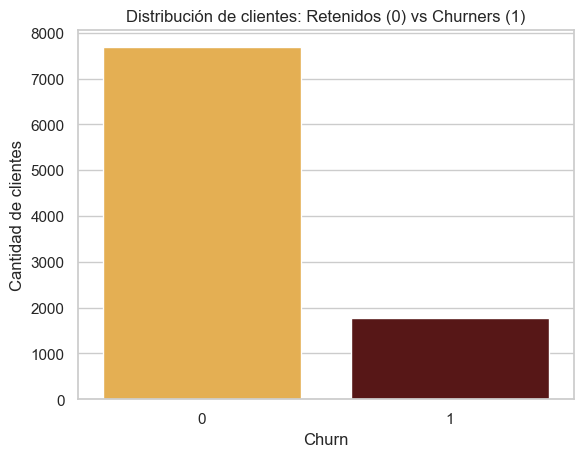

In [57]:
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / len(df) * 100

print("Distribución de Churn:")
print(churn_counts)
print("\nPorcentaje por clase:")
print(churn_percent.round(2))

#visualización 
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#FCB53B', '#620c0c'])
plt.title('Distribución de clientes: Retenidos (0) vs Churners (1)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


In [36]:
"""
cuantificar bien, con numeros claros, cantidad y porcentaje. visualizar comparativamente. con foco en el desbalance: para variables continuas como balance salary, age, amountscale, se peude usar densidades, histogramas, y boxplots pero siempre de lado a lado separados por exited, la forma de la distribucion de los churners es igual pero mas baja que lso no churners o es distinta ? el balance de lso churners se concentra en 0 o es bimodal ?, el amountscale es totalmente diferente ? categoricas como, geography, numbofproduct, exactmember, no mostrar solo el conteo total, si no la proporcion de churner = 0 e chuners=1 dentro de cada categoria, ejemplo, es ams alto en alemania ? o miembros activos ? documentar los hallazgos, ejemplo, en un resumen tipo: el balance es fuerte mostrar % los churners se ven distintos en balanceof propducts, balance pero dsitintos en age la tasa de churn es mayor en pais x y miembros inactivos. luego de esto revisar si debo ahcer undersampling ,smote (tiene sentido porque los churner hacen un grupo ams o menos coherente), oversampling, o que requeiro. y porque mirar solo el accuary es bueno o malo y si debo enfocarme en precision, recall, f1, etc. IMPORTANTE: 1) entender de donde vienne lso datos: genealogia de lso datos 2) enfocar el analisis en comparar churners y no churners, sobre todo con variables transaccionales, interaccion app y generadas: analisis comparativo como guia 3) no solo ver el desbalanceo si no diagnosticarlo a fondo con el EDA: catarcterizar correctamente a la minoria. esto pasa un EDA del que cumple a uno que abre bien lso ojos al equipo. REPASANDO ACCIONES CONCRETAS a implementar: 1) armar y validar el mapa detallado de variables 2)priorizar siempre las visualizaciones comparativas por grupo de exited 3)dedicar tiempo a cuantificar y describir como se ven lso churner en las varaibles calves.

"""

'\ncuantificar bien, con numeros claros, cantidad y porcentaje. visualizar comparativamente. con foco en el desbalance: para variables continuas como balance salary, age, amountscale, se peude usar densidades, histogramas, y boxplots pero siempre de lado a lado separados por exited, la forma de la distribucion de los churners es igual pero mas baja que lso no churners o es distinta ? el balance de lso churners se concentra en 0 o es bimodal ?, el amountscale es totalmente diferente ? categoricas como, geography, numbofproduct, exactmember, no mostrar solo el conteo total, si no la proporcion de churner = 0 e chuners=1 dentro de cada categoria, ejemplo, es ams alto en alemania ? o miembros activos ? documentar los hallazgos, ejemplo, en un resumen tipo: el balance es fuerte mostrar % los churners se ven distintos en balanceof propducts, balance pero dsitintos en age la tasa de churn es mayor en pais x y miembros inactivos. luego de esto revisar si debo ahcer undersampling ,smote (tiene 


==================== CustomerId ====================
Churn             0             1
count  7.684000e+03  1.771000e+03
mean   1.569114e+07  1.568989e+07
std    7.174502e+04  7.231849e+04
min    1.556570e+07  1.556571e+07
25%    1.562889e+07  1.562845e+07
50%    1.569162e+07  1.568895e+07
75%    1.575301e+07  1.575153e+07
max    1.581569e+07  1.581566e+07


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


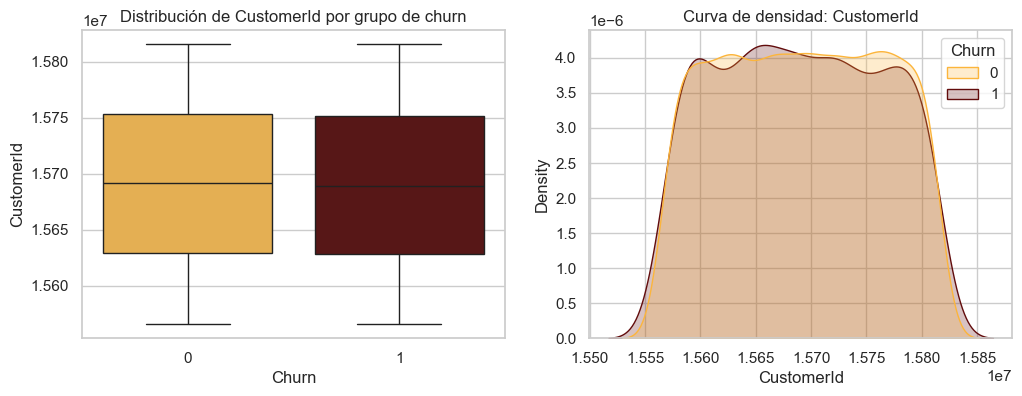


==================== CreditScore ====================
Churn            0            1
count  7684.000000  1771.000000
mean    651.693779   644.920949
std      95.742027   100.669575
min     405.000000   350.000000
25%     584.750000   577.500000
50%     653.000000   645.000000
75%     718.000000   717.000000
max     850.000000   850.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


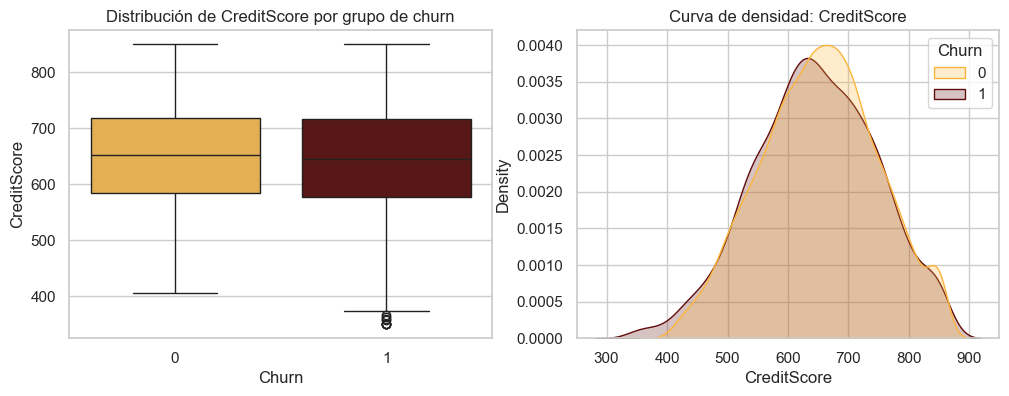


==================== Gender ====================
Churn            0            1
count  7684.000000  1771.000000
mean      0.574050     0.440994
std       0.494518     0.496646
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


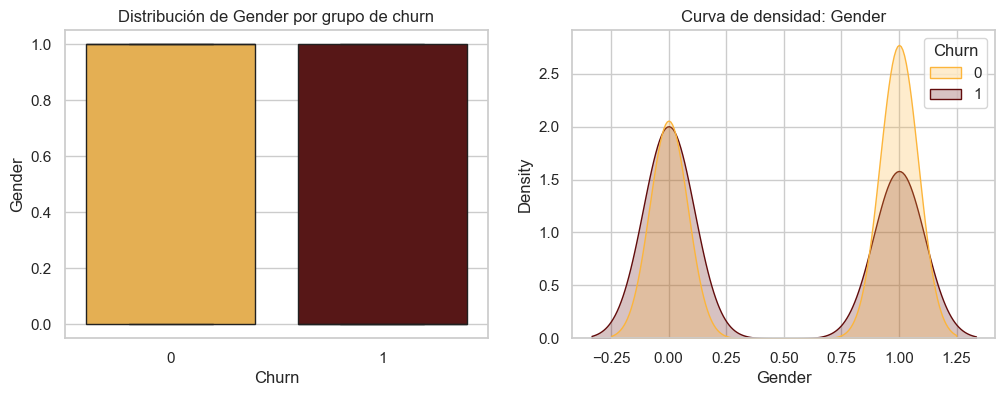


==================== Age ====================
Churn            0            1
count  7684.000000  1771.000000
mean     37.395497    44.754376
std      10.114759     9.883278
min      18.000000    18.000000
25%      31.000000    38.000000
50%      36.000000    45.000000
75%      41.000000    51.000000
max      92.000000    74.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


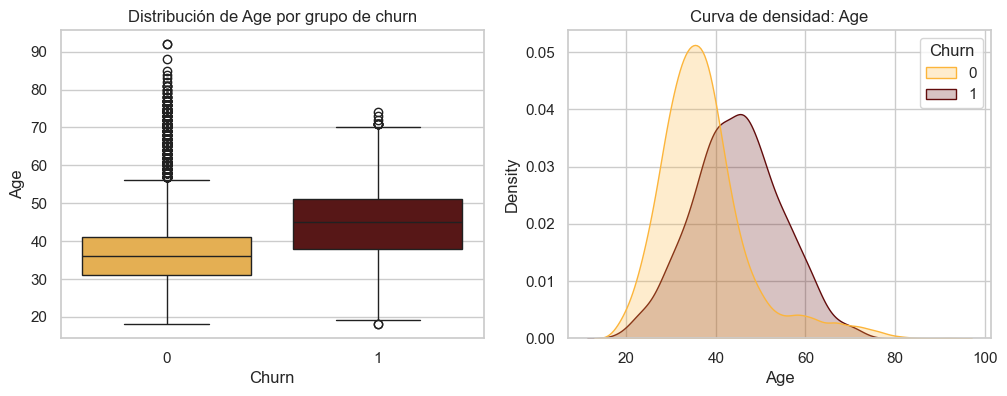


==================== Tenure ====================
Churn            0            1
count  7684.000000  1771.000000
mean      5.216033     5.156409
std       2.765168     2.800693
min       0.000000     0.000000
25%       3.000000     3.000000
50%       5.000000     5.000000
75%       8.000000     8.000000
max      10.000000    10.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


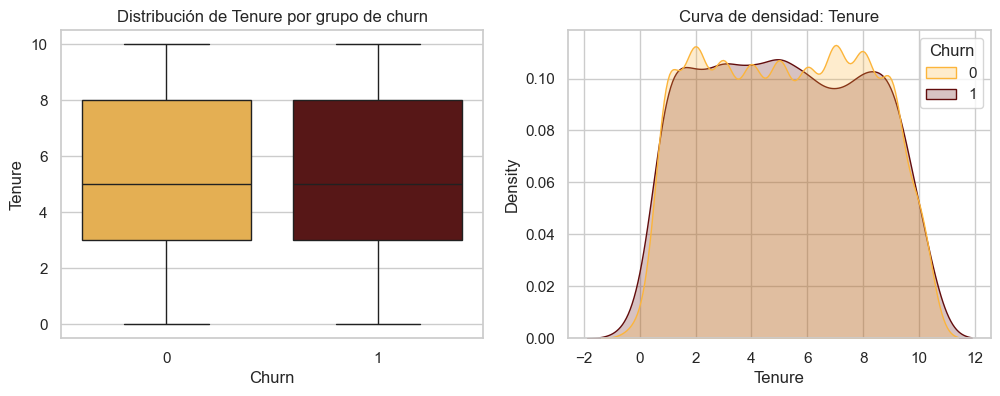


==================== Balance ====================
Churn              0              1
count    7684.000000    1771.000000
mean    72661.726862   91067.715110
std     62860.158684   58355.339976
min         0.000000       0.000000
25%         0.000000   37453.490000
50%     91946.960000  109733.200000
75%    126296.105000  130833.750000
max    221532.800000  250898.090000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


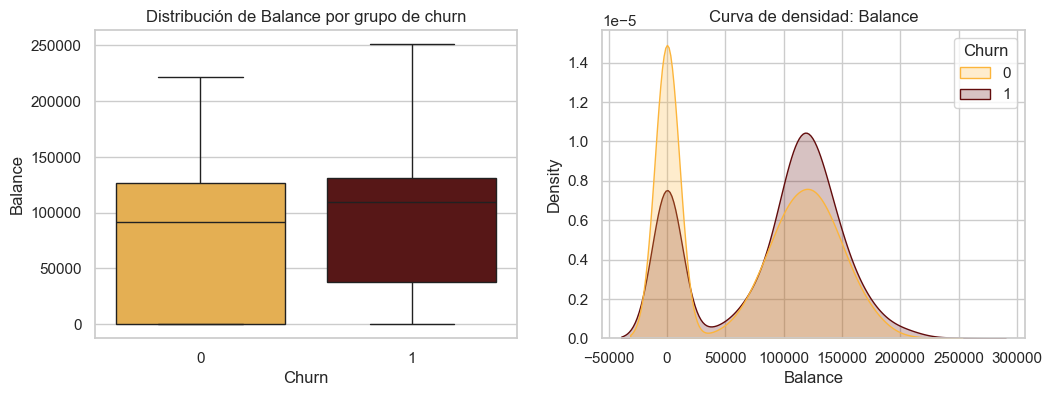


==================== NumOfProducts ====================
Churn            0            1
count  7684.000000  1771.000000
mean      1.547111     1.480519
std       0.509693     0.808877
min       1.000000     1.000000
25%       1.000000     1.000000
50%       2.000000     1.000000
75%       2.000000     2.000000
max       3.000000     4.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


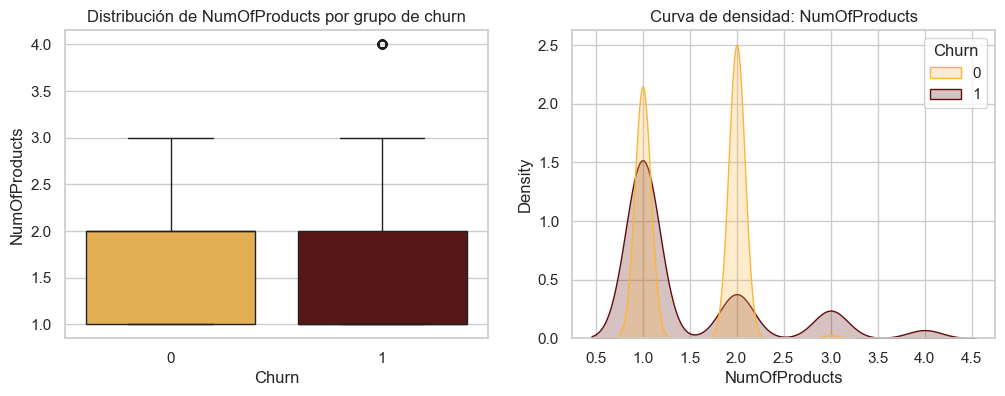


==================== HasCrCard ====================
Churn            0            1
count  7684.000000  1771.000000
mean      0.709396     0.700169
std       0.454071     0.458313
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     1.000000
75%       1.000000     1.000000
max       1.000000     1.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


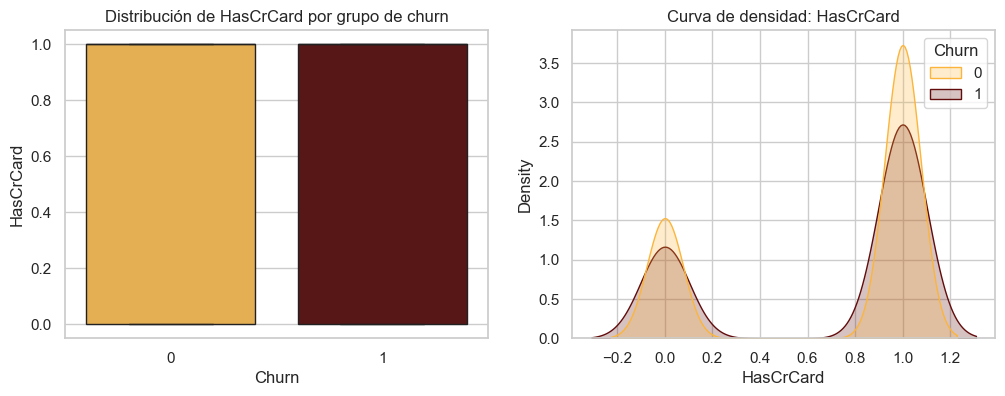


==================== IsActiveMember ====================
Churn            0            1
count  7684.000000  1771.000000
mean      0.554138     0.352343
std       0.497093     0.477835
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


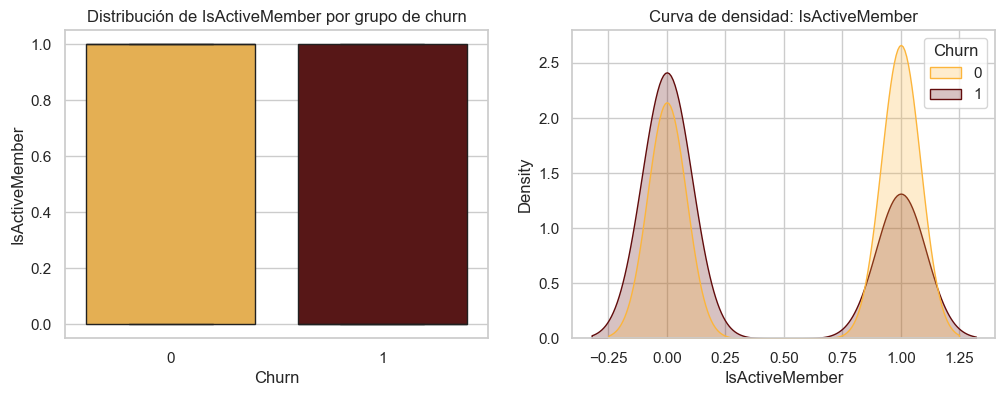


==================== EstimatedSalary ====================
Churn              0              1
count    7684.000000    1771.000000
mean    99491.656688  101799.329209
std     57481.973730   57407.590220
min        90.070000      11.580000
25%     50456.600000   52777.690000
50%     99052.040000  102628.560000
75%    148354.460000  151130.790000
max    199992.480000  199808.100000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


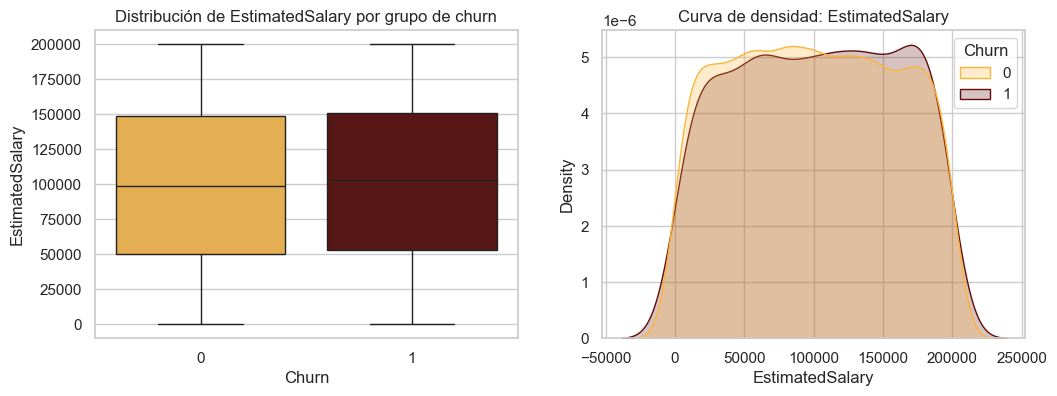


==================== days_since_last_tx ====================
Churn            0            1
count  7684.000000  1771.000000
mean      3.864394     5.933371
std      14.237415    16.421051
min       1.000000     1.000000
25%       1.000000     1.000000
50%       1.000000     2.000000
75%       2.000000     5.000000
max     180.000000   180.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


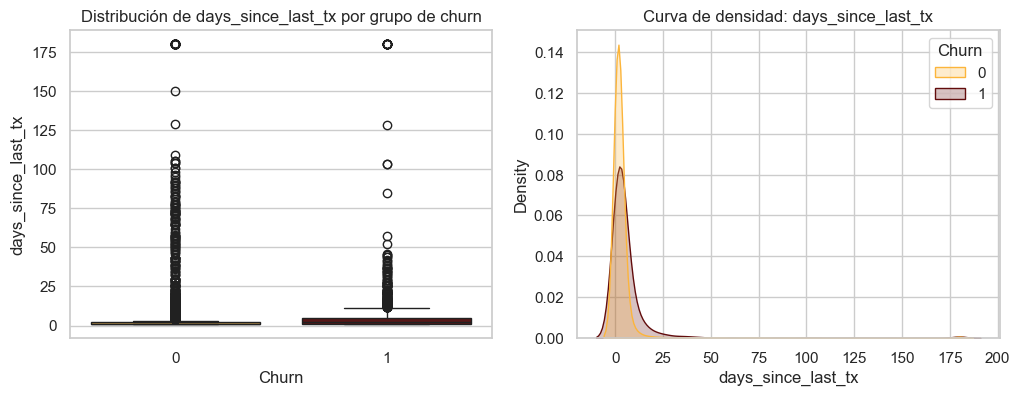


==================== txs_avg_amount ====================
Churn             0             1
count  7.684000e+03  1.771000e+03
mean   1.573987e+05  1.700480e+05
std    6.376558e+04  8.916112e+04
min    0.000000e+00  0.000000e+00
25%    1.229431e+05  1.165316e+05
50%    1.421319e+05  1.443094e+05
75%    1.717004e+05  2.055366e+05
max    1.570811e+06  1.134242e+06


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


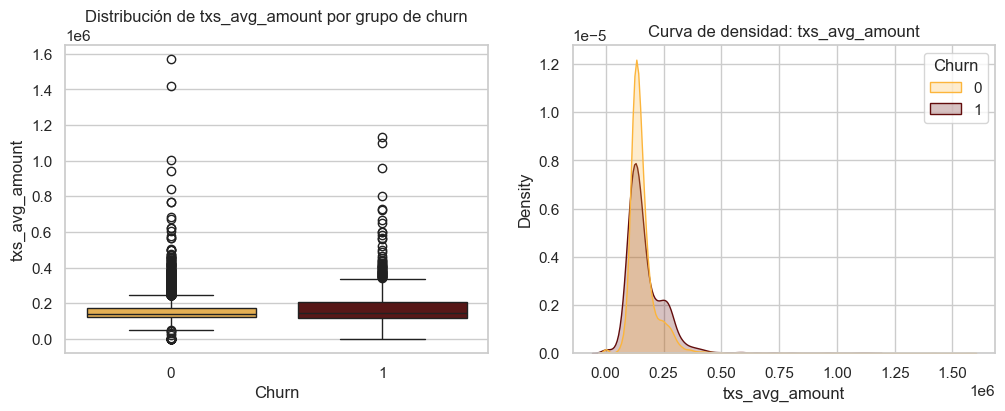


==================== amount_std ====================
Churn             0             1
count  7.684000e+03  1.771000e+03
mean   3.869197e+05  3.682152e+05
std    4.019310e+05  4.028007e+05
min    0.000000e+00  0.000000e+00
25%    1.903348e+05  1.598271e+05
50%    2.639103e+05  2.428553e+05
75%    4.247412e+05  4.129238e+05
max    7.022862e+06  4.860295e+06


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


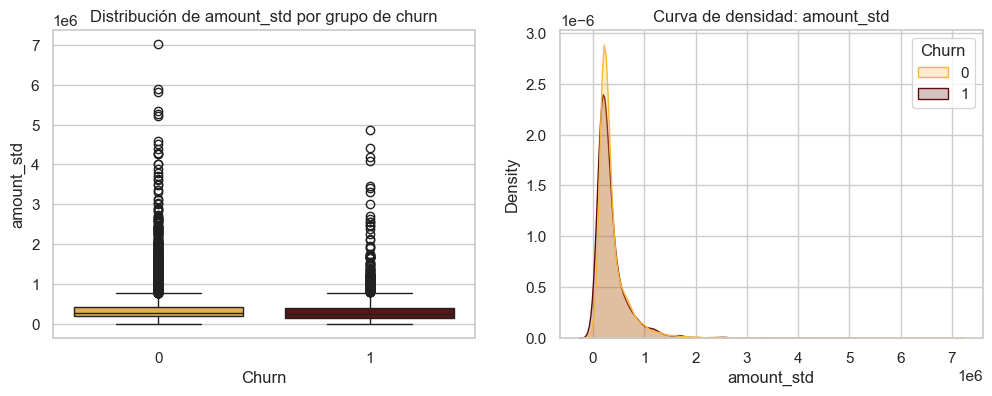


==================== avg_cashout_amount ====================
Churn              0              1
count    7684.000000    1771.000000
mean   152020.175787  160141.636118
std     38392.071364   55812.561161
min         0.000000       0.000000
25%    128347.113250  125716.397750
50%    146694.310113  149756.269231
75%    167992.598327  191361.403150
max    661787.233333  728758.365882


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


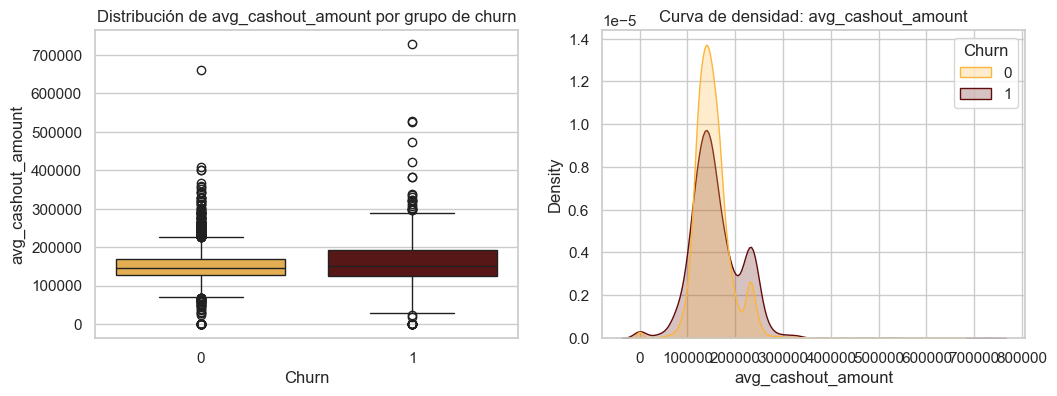


==================== ratio_recent_vs_past_txs ====================
Churn            0            1
count  7684.000000  1771.000000
mean      0.027473    -0.015786
std       0.141150     0.098910
min      -1.496642    -0.393700
25%      -0.042925    -0.076540
50%       0.027652    -0.013793
75%       0.100644     0.044127
max       1.561647     0.407826


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


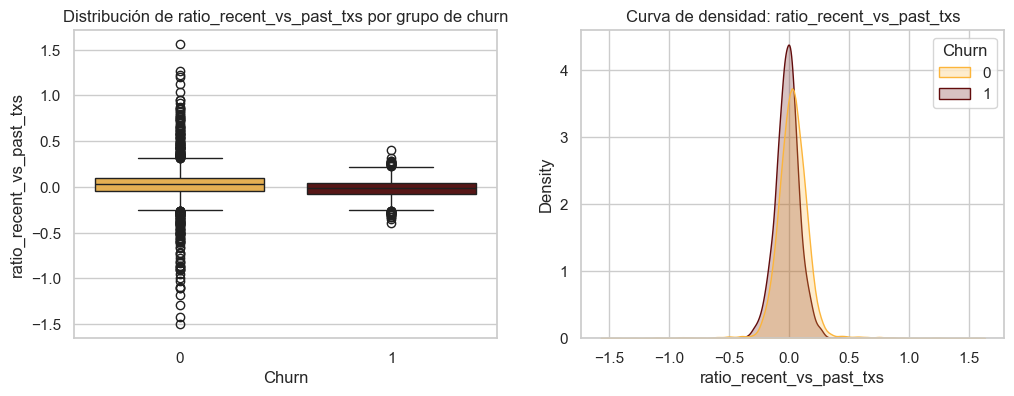


==================== ratio_recent_vs_past_amount ====================
Churn            0            1
count  7684.000000  1771.000000
mean     -0.055679    -0.325210
std       1.701791     1.592222
min     -13.590817   -10.721076
25%      -0.360619    -0.692450
50%       0.020651    -0.129260
75%       0.398202     0.362833
max      13.686229     6.944860


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


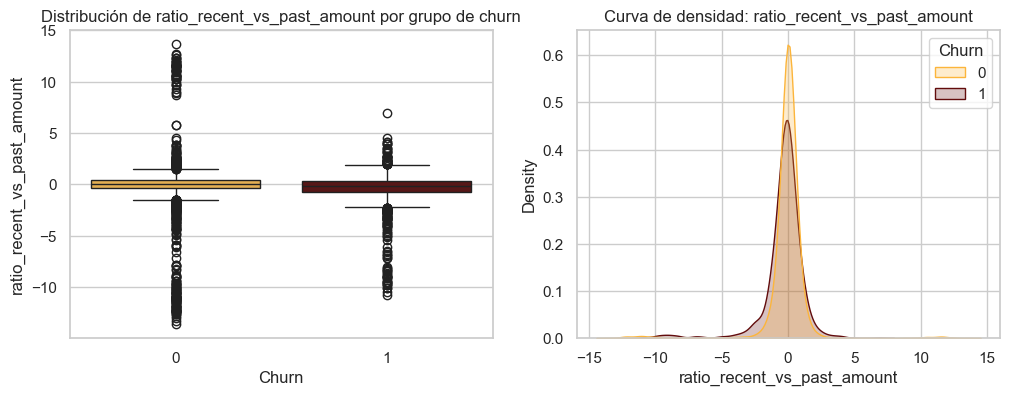


==================== ratio_cashouts ====================
Churn            0            1
count  7684.000000  1771.000000
mean     -1.150665    -1.083673
std       0.216732     0.303317
min      -2.484907    -2.564949
25%      -1.275999    -1.268511
50%      -1.172720    -1.113880
75%      -1.060872    -0.897942
max       0.000000     0.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


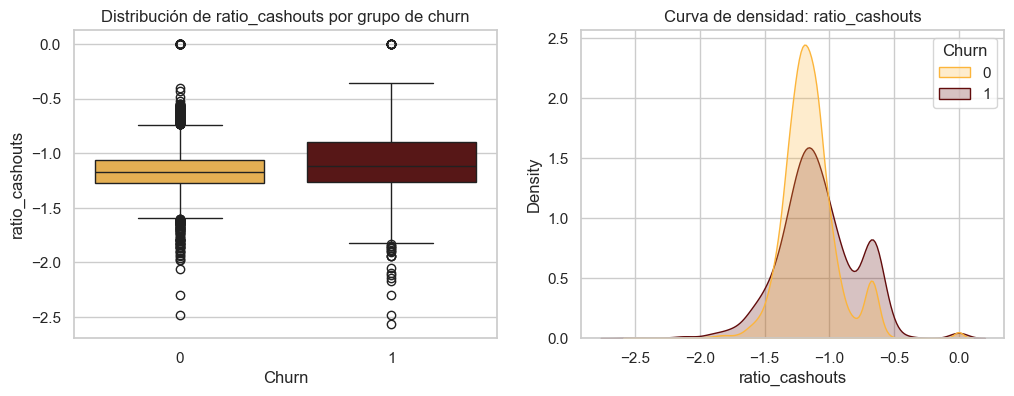


==================== ratio_transfers ====================
Churn            0            1
count  7684.000000  1771.000000
mean     -2.366949    -2.346697
std       0.372245     0.487615
min      -4.553877    -4.343805
25%      -2.560667    -2.656757
50%      -2.343407    -2.316770
75%      -2.164856    -2.067438
max       0.000000     0.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


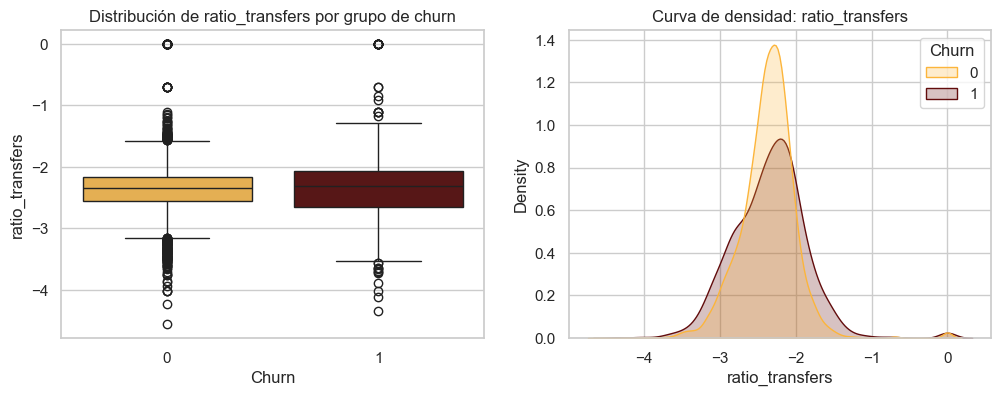


==================== inflation_pressure ====================
Churn            0            1
count  7684.000000  1771.000000
mean      0.055799     0.060943
std       0.075679     0.080857
min      -0.057988    -0.059513
25%       0.029307     0.027692
50%       0.045160     0.046283
75%       0.061550     0.067381
max       0.906645     0.940718


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


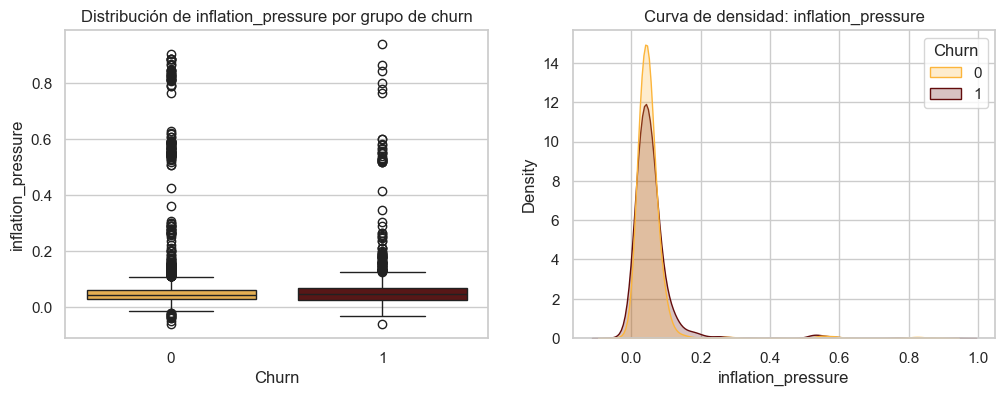


==================== days_since_last_ss ====================
Churn            0            1
count  7684.000000  1771.000000
mean     10.515357    17.074534
std      19.421509    18.509582
min       1.000000     1.000000
25%       3.000000     4.000000
50%       6.000000    10.000000
75%      12.000000    24.000000
max     668.000000   134.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


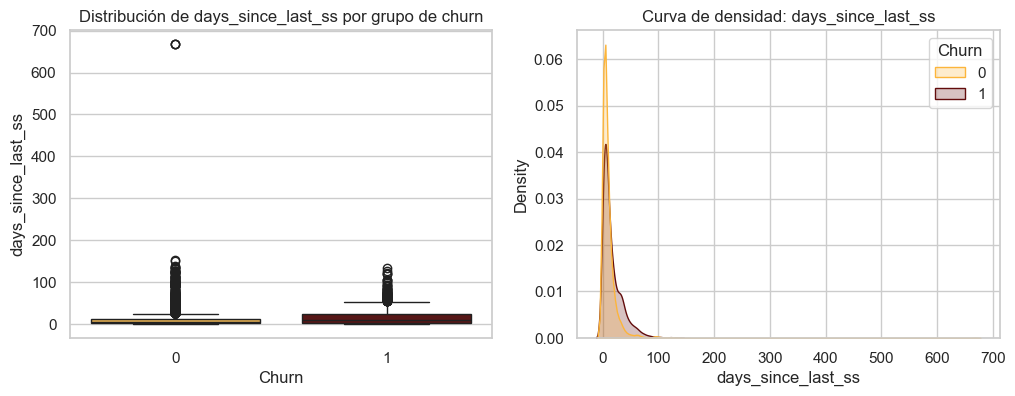


==================== total_ss_past30d ====================
Churn            0            1
count  7684.000000  1771.000000
mean      4.328995     2.701299
std       3.034195     2.729933
min       0.000000     0.000000
25%       2.000000     1.000000
50%       4.000000     2.000000
75%       6.000000     4.000000
max      23.000000    21.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


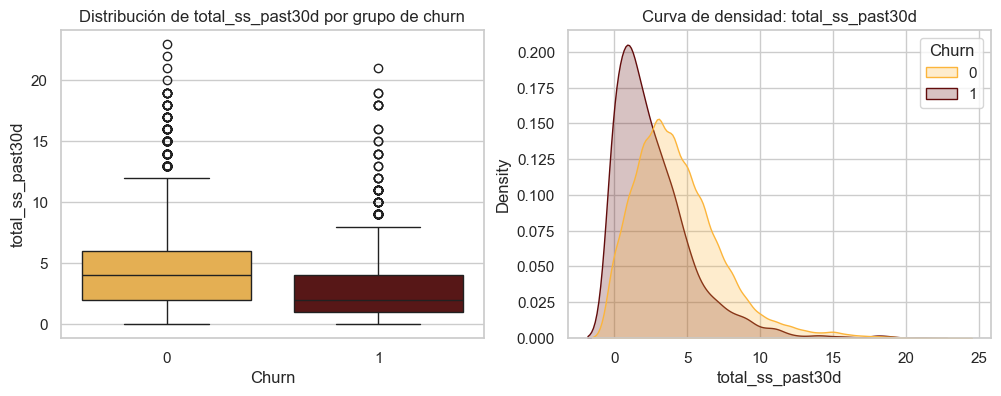


==================== total_ss_past90d ====================
Churn            0            1
count  7684.000000  1771.000000
mean     12.865435     9.929983
std       7.106018     7.034994
min       0.000000     0.000000
25%       8.000000     5.000000
50%      12.000000     8.000000
75%      16.000000    13.000000
max      57.000000    50.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


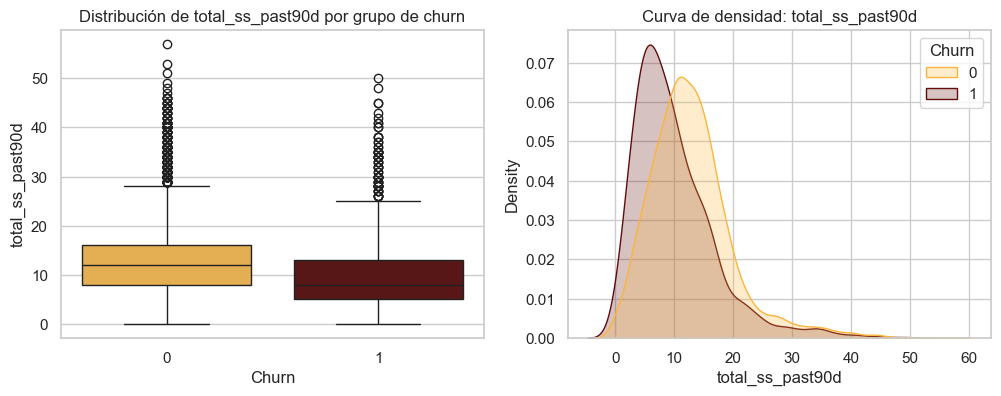


==================== avg_ss_per_wk ====================
Churn            0            1
count  7684.000000  1771.000000
mean      1.073637     1.053397
std       0.502326     0.535805
min       0.000000     0.105263
25%       0.760000     0.700000
50%       1.000000     0.923077
75%       1.272727     1.260870
max       4.153846     3.807692


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


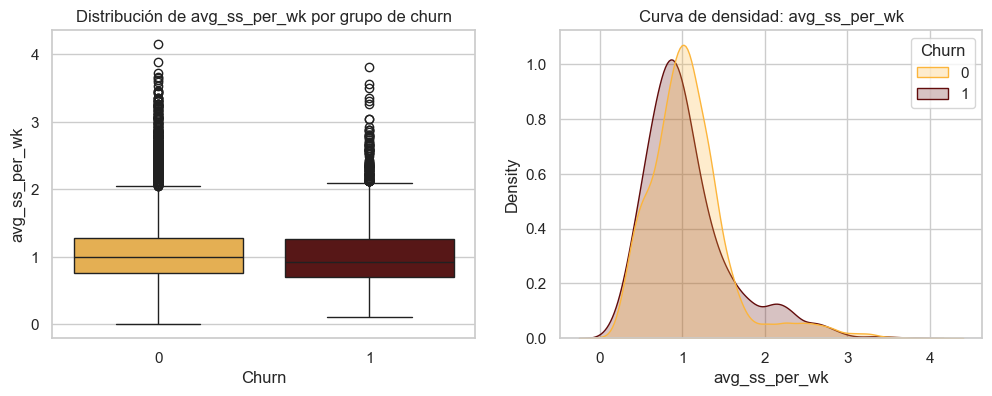


==================== avg_ss_duration_min ====================
Churn            0            1
count  7684.000000  1771.000000
mean     16.654660    19.027406
std       6.205457     6.986557
min       0.000000     4.732165
25%      11.843845    13.828241
50%      16.270118    18.317894
75%      20.445883    23.337777
max      42.424335    50.745256


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


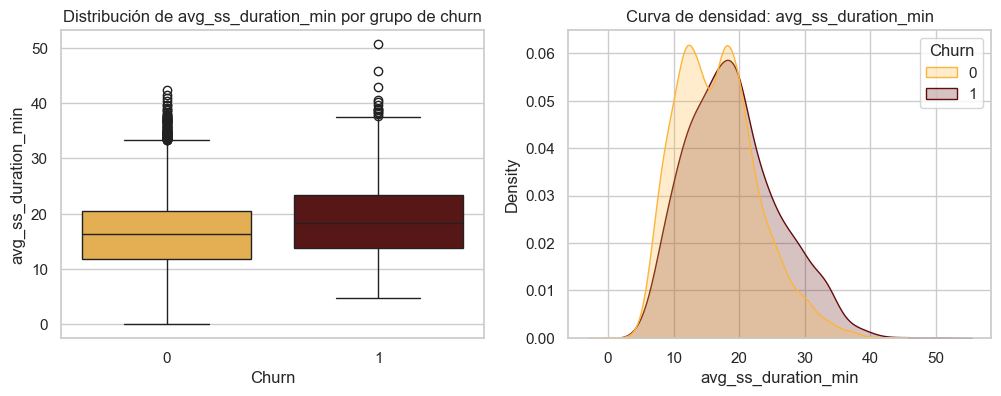


==================== std_ss_duration_min ====================
Churn            0            1
count  7684.000000  1771.000000
mean     13.848440    16.382016
std       7.891788     8.985638
min       0.000000     0.000000
25%       7.913866     9.709241
50%      12.343626    14.803540
75%      17.849951    21.450720
max      51.139572    47.626690


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


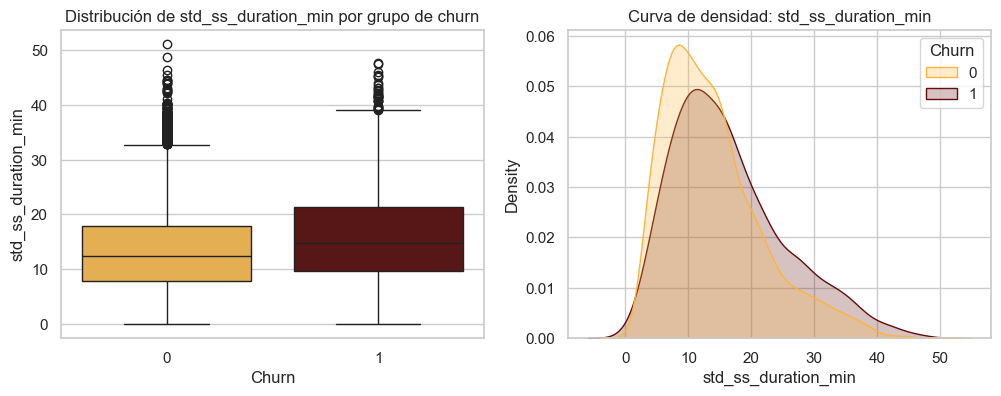


==================== ratio_ss_time_recent_vs_past ====================
Churn            0            1
count  7684.000000  1771.000000
mean     -0.039823    -0.258821
std       0.562338     0.610443
min      -2.931724    -2.333401
25%      -0.398447    -0.667283
50%      -0.021966    -0.253090
75%       0.315757     0.139467
max       2.920430     1.740758


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


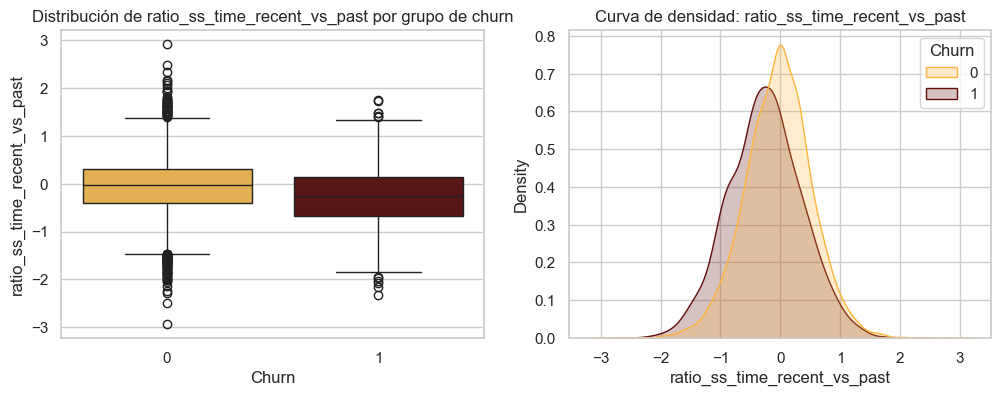


==================== ratio_events_sessios ====================
Churn            0            1
count  7684.000000  1771.000000
mean     -1.457790    -1.272674
std       0.520399     0.555291
min      -3.433987    -3.258097
25%      -1.791759    -1.609438
50%      -1.413693    -1.252763
75%      -1.126011    -0.887303
max      -0.123614     0.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


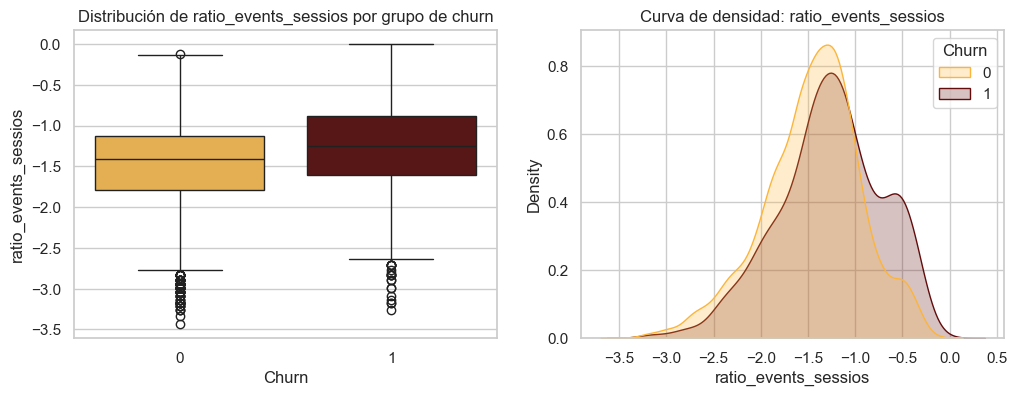


==================== ratio_failed_ss ====================
Churn            0            1
count  7684.000000  1771.000000
mean     -2.835479    -2.823805
std       0.551080     0.595113
min      -4.691348    -4.499810
25%      -3.258097    -3.218876
50%      -2.833213    -2.833213
75%      -2.442347    -2.397895
max      -0.693147    -0.693147


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


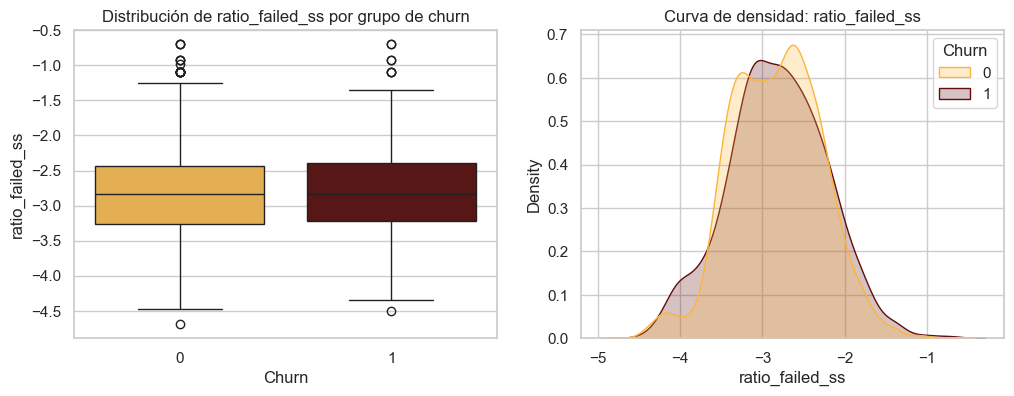


==================== total_opened_push ====================
Churn            0            1
count  7684.000000  1771.000000
mean      4.670744     5.425184
std       5.254043     6.174709
min       0.000000     0.000000
25%       2.000000     2.000000
50%       3.000000     3.000000
75%       6.000000     6.000000
max      43.000000    40.000000


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\426153912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])


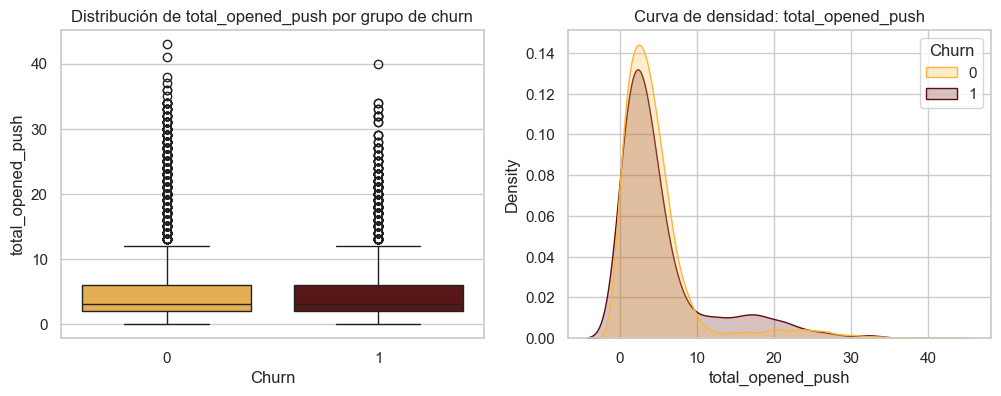

In [58]:
# Define target variable
target = "Churn"

# --- Seleccionar variables numéricas ---
num_cols = df.select_dtypes(include=np.number).drop(columns=[target]).columns

for col in num_cols:
    print(f"\n==================== {col} ====================")
    print(df.groupby(target)[col].describe().T)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # '#620c0c '#FCB53B
    # Boxplot comparativo
    sns.boxplot(data=df, x=target, y=col, ax=axes[0], palette=['#FCB53B', '#620c0c'])
    axes[0].set_title(f'Distribución de {col} por grupo de churn')
    
    # Densidad comparativa
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, ax=axes[1], palette=['#FCB53B', '#620c0c'])
    axes[1].set_title(f'Curva de densidad: {col}')
    
    plt.show()



==================== Geography ====================
Churn          0      1
Geography              
France     85.32  14.68
Germany    69.59  30.41
Spain      84.74  15.26


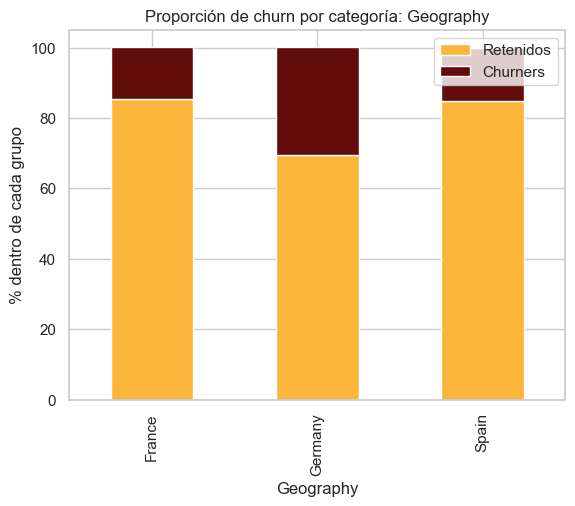


==================== Gender ====================
Churn       0      1
Gender              
Female  76.78  23.22
Male    84.96  15.04


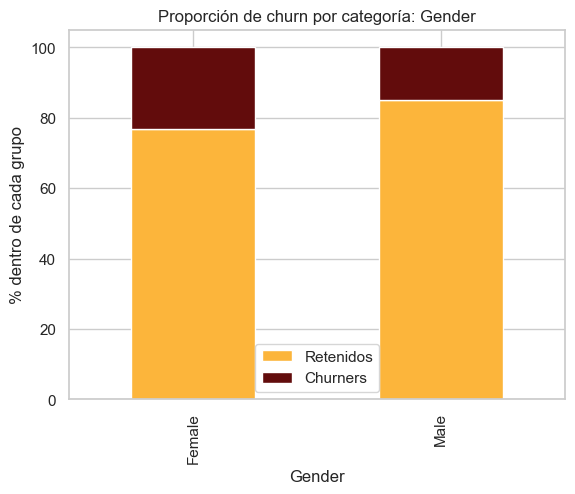

In [38]:
#Seleccionar variables categóricas
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

for col in cat_cols:
    print(f"\n==================== {col} ====================")
    tabla = pd.crosstab(df[col], df[target], normalize='index') * 100
    print(tabla.round(2))
    #palette=['#FCB53B', '#620c0c']
    tabla.plot(kind='bar', stacked=True, color=['#FCB53B', '#620c0c'])
    plt.title(f'Proporción de churn por categoría: {col}')
    plt.ylabel('% dentro de cada grupo')
    plt.xlabel(col)
    plt.legend(['Retenidos', 'Churners'])
    plt.show()


prueba 


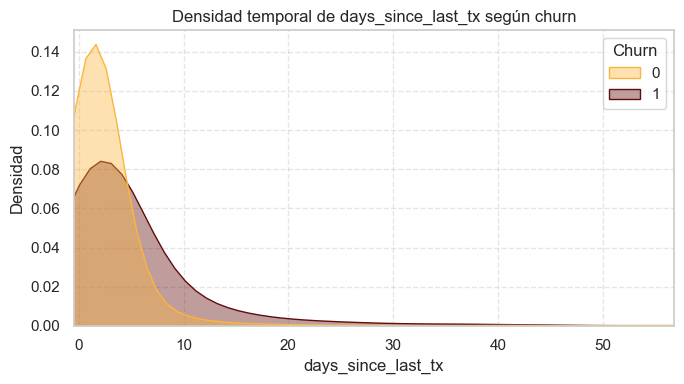

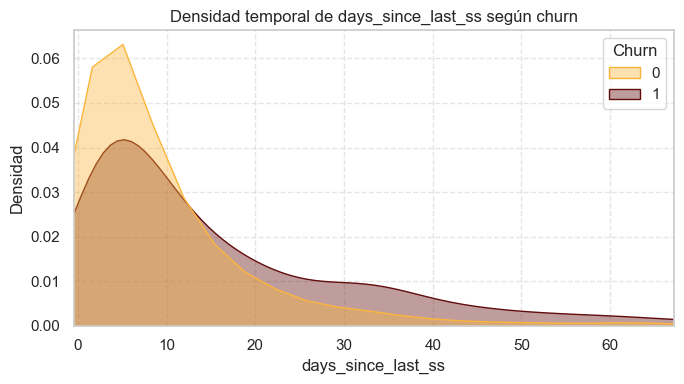

In [63]:
temporal_vars = ['days_since_last_tx', 'days_since_last_ss']

for col in temporal_vars:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        
        sns.kdeplot(
            data=df, x=col, hue=target, fill=True,
            common_norm=False, palette=['#FCB53B', '#620c0c'], alpha=0.4
        )

        # Limitar solo el extremo derecho, pero sin cortar el inicio
        p99 = df[col].quantile(0.99)
        plt.xlim(left=-0.5, right=p99 * 0.8)  # 0.8 para mantener un poco más del rango principal
        
        plt.title(f'Densidad temporal de {col} según churn')
        plt.xlabel(col)
        plt.ylabel('Densidad')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


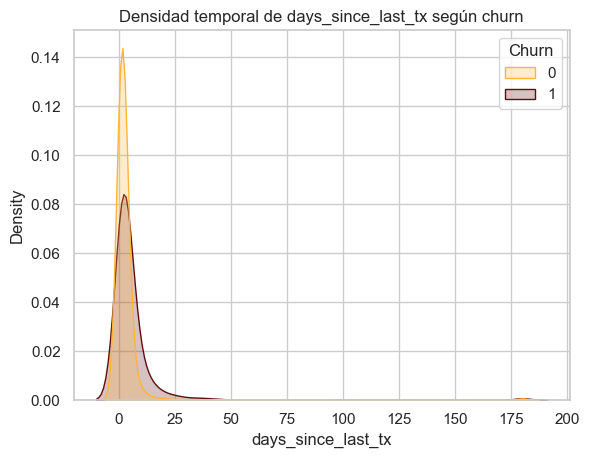

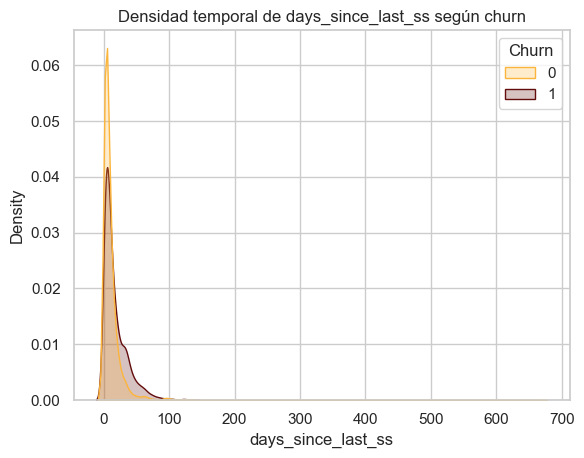

In [61]:
#palette=['#FCB53B', '#620c0c']

temporal_vars = ['days_since_last_tx', 'days_since_last_ss']

for col in temporal_vars:
    if col in df.columns:
        sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False, palette=['#FCB53B', '#620c0c'])
        plt.title(f'Densidad temporal de {col} según churn')
        plt.show()


#palette=['#FCB53B', '#620c0c']
Muestra cómo varía el promedio de cada métrica (ratio, score, pressure) entre clientes que se fueron y los que no.

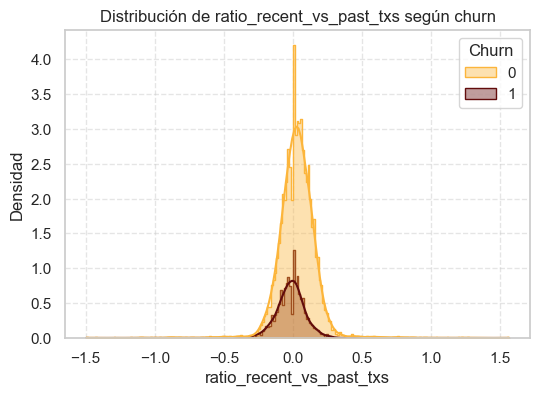

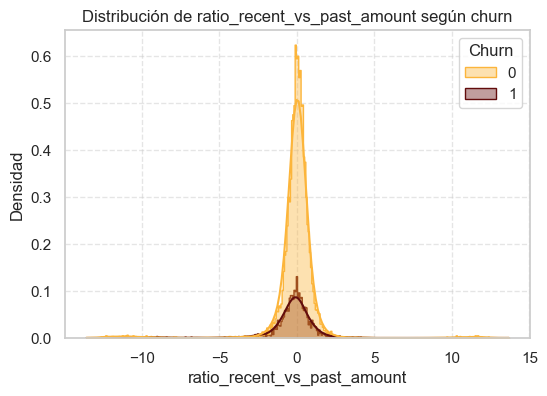

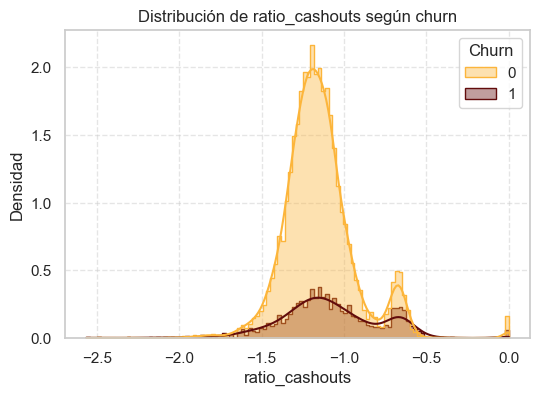

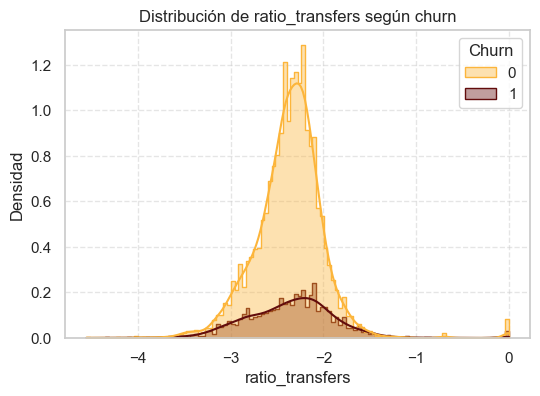

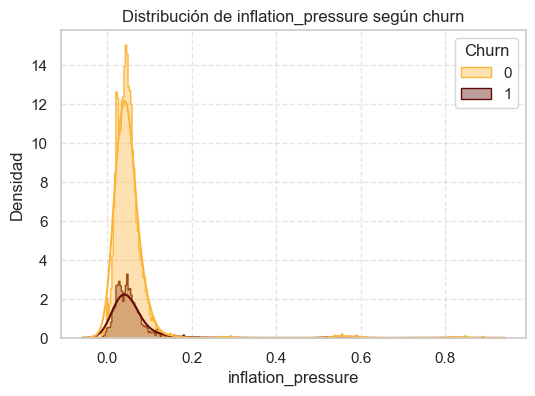

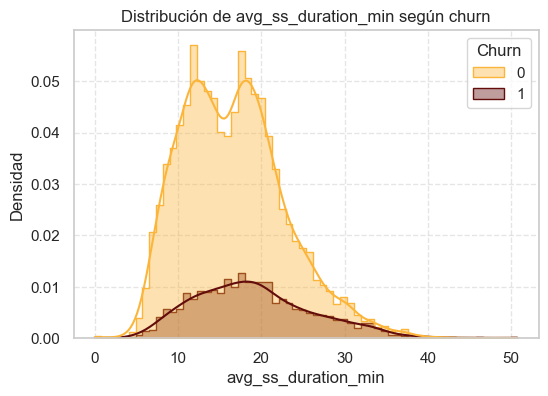

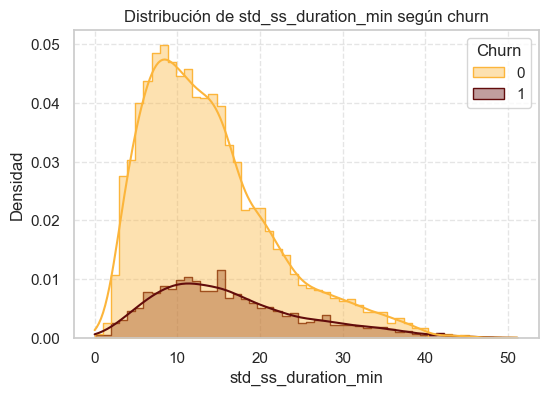

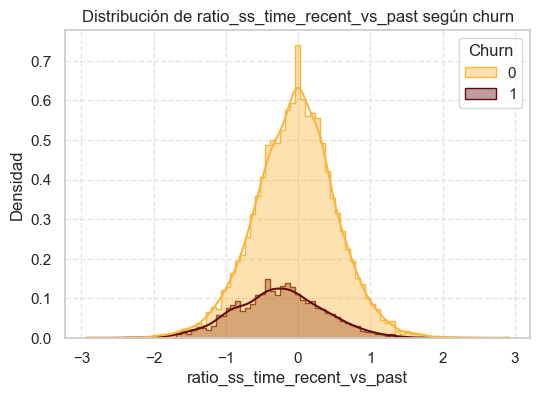

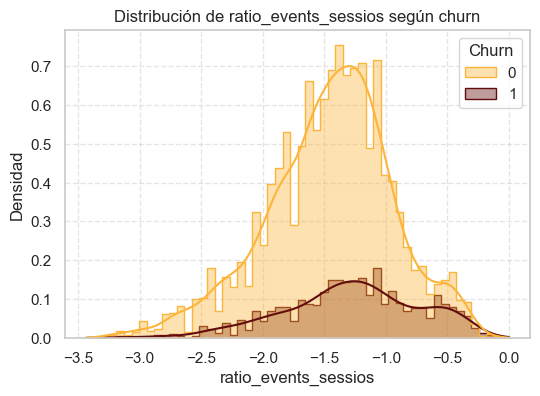

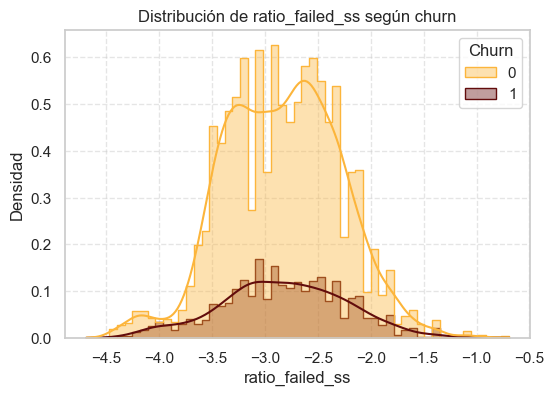

In [60]:
score_cols = [c for c in df.columns if 'ratio' in c or 'score' in c or 'pressure' in c]

for col in score_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(data=df, x=col, hue=target, kde=True, stat="density",
                     palette=['#FCB53B', '#620c0c'], element="step", alpha=0.4)
        plt.title(f'Distribución de {col} según churn')
        plt.xlabel(col)
        plt.ylabel('Densidad')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


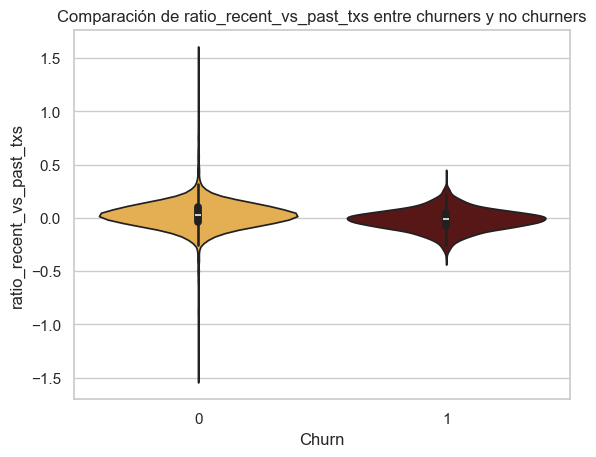

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


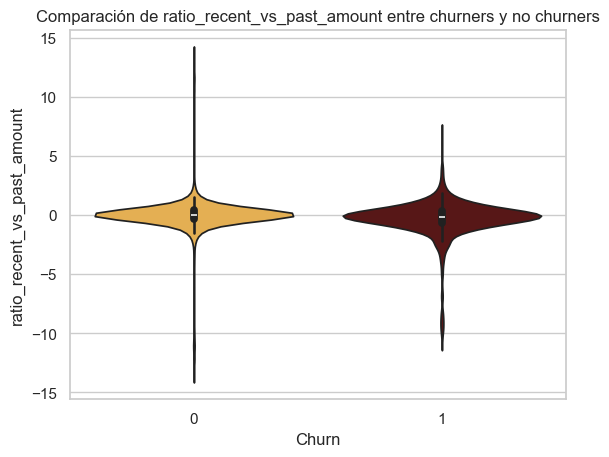

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


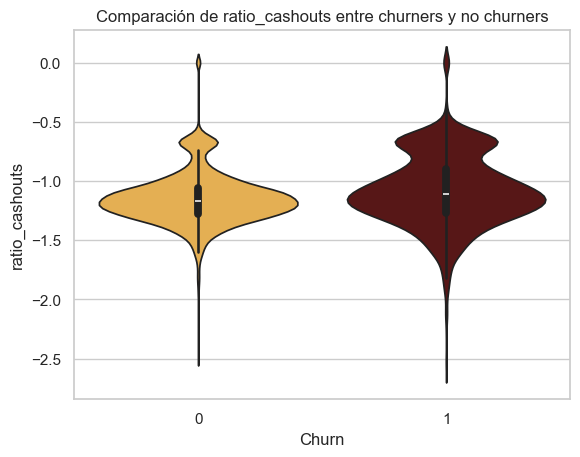

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


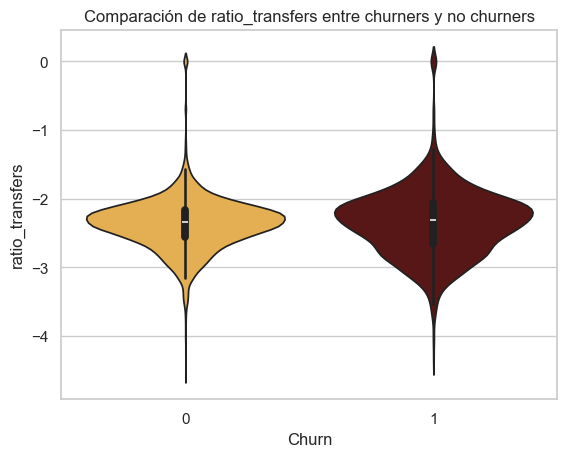

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


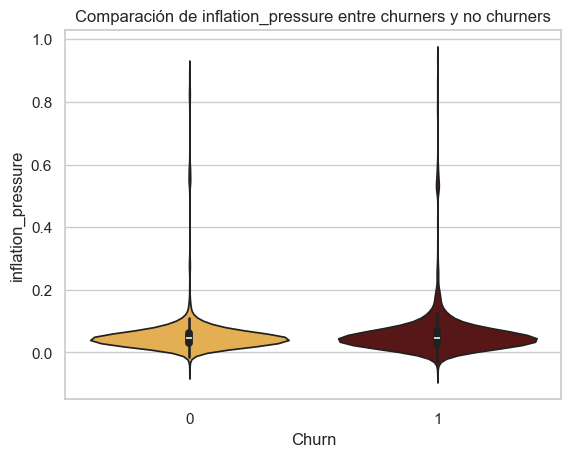

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


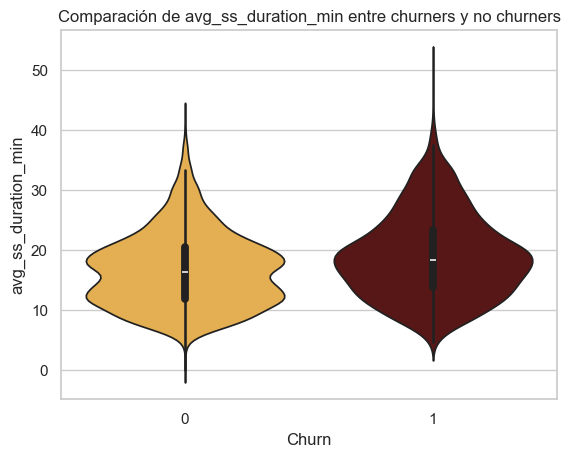

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


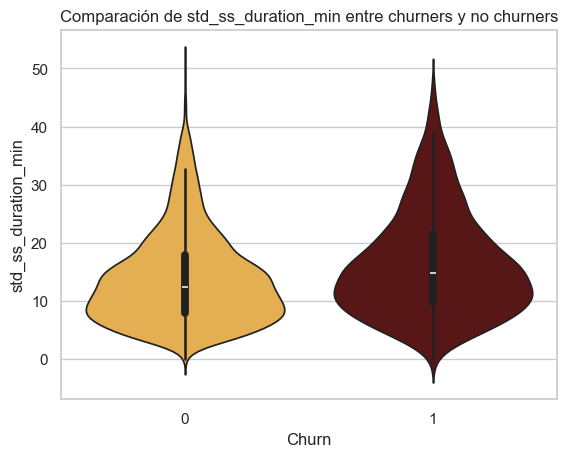

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


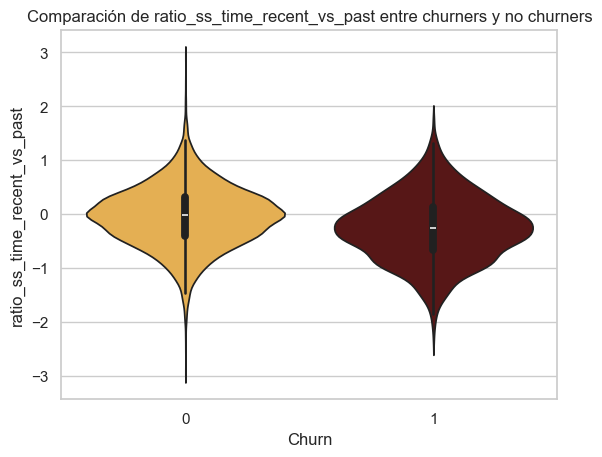

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


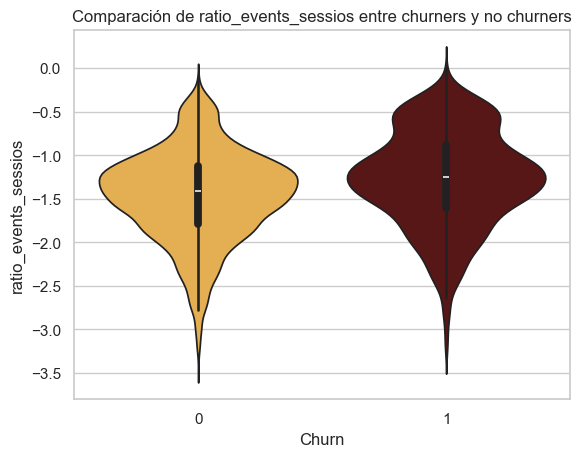

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\2405684443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])


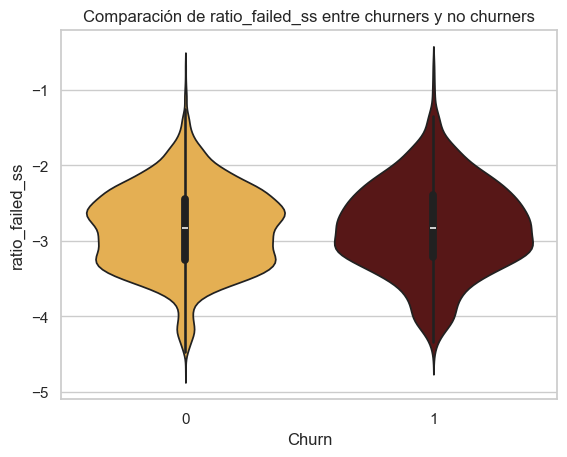

In [64]:
score_cols = [c for c in df.columns if 'ratio' in c or 'score' in c or 'pressure' in c]

for col in score_cols:
    if col in df.columns:
        sns.violinplot(data=df, x=target, y=col, palette=['#FCB53B', '#620c0c'])
        plt.title(f'Comparación de {col} entre churners y no churners')
        plt.show()


** Correlaciones y relaciones cruzadas **

🔹 Correlación de cada variable con Churn:

Churn                           1.000000
Age                             0.274171
avg_ss_duration_min             0.144077
ratio_events_sessios            0.135766
days_since_last_ss              0.131768
std_ss_duration_min             0.121035
Balance                         0.114993
ratio_cashouts                  0.110377
avg_cashout_amount              0.074876
txs_avg_amount                  0.071111
days_since_last_tx              0.054945
total_opened_push               0.054052
inflation_pressure              0.026169
ratio_transfers                 0.019931
EstimatedSalary                 0.015667
ratio_failed_ss                 0.008140
CustomerId                     -0.006761
HasCrCard                      -0.007915
Tenure                         -0.008393
avg_ss_per_wk                  -0.015521
amount_std                     -0.018148
CreditScore                    -0.027324
NumOfProducts                  -0.044939
ratio_recent_v

C:\Users\patri\AppData\Local\Temp\ipykernel_8584\3812099396.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.index, y=corr_target.values, palette='coolwarm')


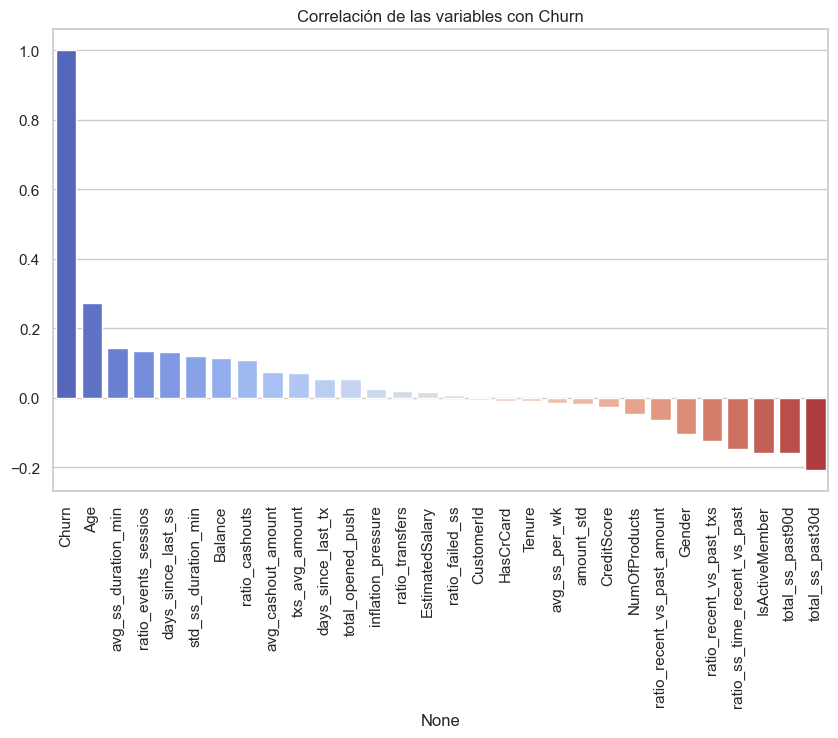

In [65]:
# Solo columnas numéricas para la correlación
corr_target = df.select_dtypes(include=[np.number]).corr()[target].sort_values(ascending=False)
print("🔹 Correlación de cada variable con Churn:\n")
print(corr_target)

plt.figure(figsize=(10,6))
sns.barplot(x=corr_target.index, y=corr_target.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlación de las variables con Churn')
plt.show()


clientes en rango de edad y rango para uso.
grafico transacciones totales
grafico de linea de inflacion.


Tenemos un dataframe desbalanceado que posteriormente corregiremos para el entrenamiento de modelos

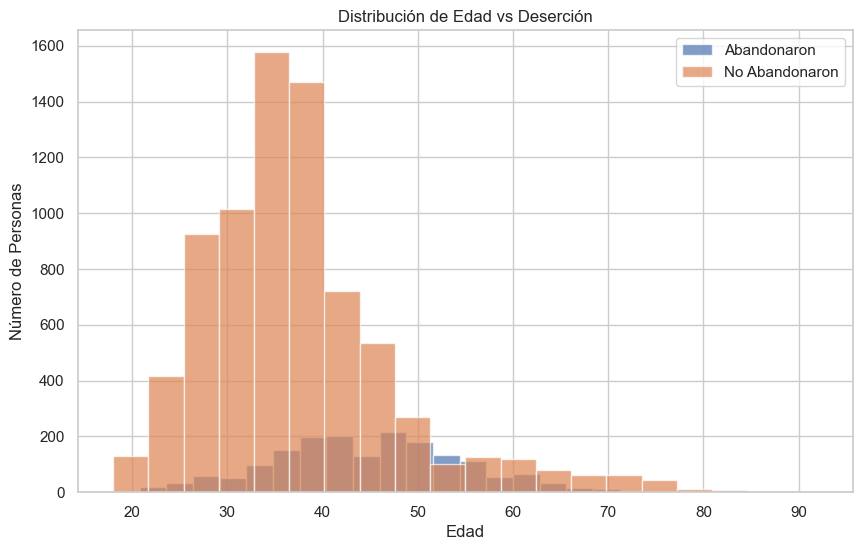

In [43]:
#¿Qué edades tienen más deserción?


# Graficamos la deserción por edad
plt.figure(figsize=(10, 6))
plt.hist(df[df['Churn'] == 1]['Age'], bins=20, alpha=0.7, label='Abandonaron')
plt.hist(df[df['Churn'] == 0]['Age'], bins=20, alpha=0.7, label='No Abandonaron')
plt.title('Distribución de Edad vs Deserción')
plt.xlabel('Edad')
plt.ylabel('Número de Personas')
plt.legend()
plt.show()

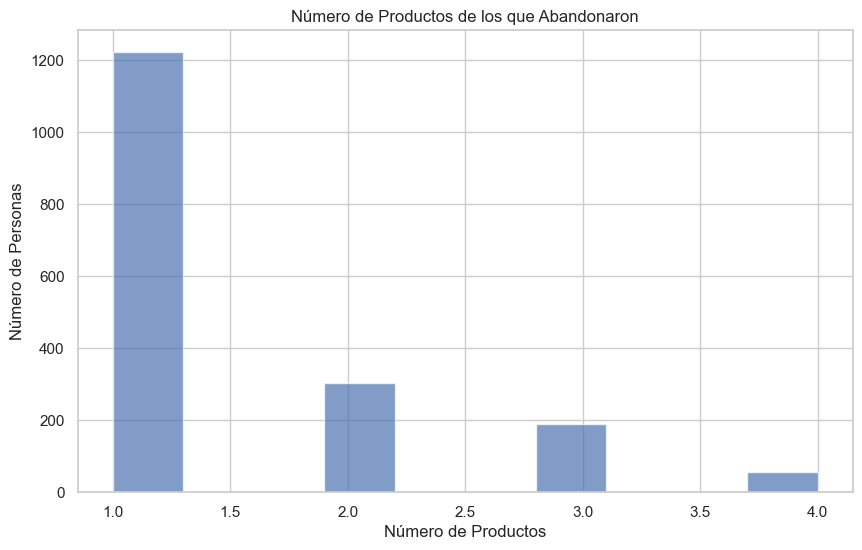

In [44]:
# Filtramos los datos de aquellos que han abandonado
exit_data = df[df['Churn'] == 1]

# Graficamos la distribución de productos para los que se fueron
plt.figure(figsize=(10, 6))
plt.hist(exit_data['NumOfProducts'], bins=10, alpha=0.7)
plt.title('Número de Productos de los que Abandonaron')
plt.xlabel('Número de Productos')
plt.ylabel('Número de Personas')
plt.show()


*** poner las categoricas horizontales*** 


### 2.1 Procesamiento de datos:


#### 2.1.1 Laber Encoding y One-hot Encoding:


se transforman variables categóricas en un formato numérico que pueda ser entendido por modelos de aprendizaje automático (machine learning). En este caso los paises en falso verdadero y los falso falso serian francia, esto requiere eliminar la primera columna (francia) para evitar la multicolinealidad.


In [46]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
#convierte la columna 'Gender' en valores numéricos (0 y 1) para que el modelo pueda procesarla correctamente.

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
#convierte la columna 'Geography' a variables dummy, con pd.get_dummies.
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,days_since_last_tx,txs_avg_amount,amount_std,avg_cashout_amount,ratio_recent_vs_past_txs,ratio_recent_vs_past_amount,ratio_cashouts,ratio_transfers,inflation_pressure,days_since_last_ss,total_ss_past30d,total_ss_past90d,avg_ss_per_wk,avg_ss_duration_min,std_ss_duration_min,ratio_ss_time_recent_vs_past,ratio_events_sessios,ratio_failed_ss,total_opened_push,Churn,Geography_Germany,Geography_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,4,45092.790000,59875.264491,87315.861667,0.015267,-1.924258,-0.826679,-2.772589,0.118815,1,1,2,0.458333,18.230805,14.026740,0.699703,-1.386294,-2.484907,2,1,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,12,86310.254211,104733.203627,233082.616667,-0.058841,-0.083882,-1.609438,-2.995732,0.022009,42,0,15,1.238095,22.245788,20.961316,-1.855429,-1.686399,-3.295837,8,0,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,241235.443506,424602.770748,229233.039288,0.067139,0.000888,-0.676026,-2.991034,0.042579,2,5,22,2.038462,32.271163,28.065546,-0.296098,-0.325422,-3.988984,18,1,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,1,96605.214000,156236.928942,106436.969500,-0.035932,1.157876,-1.145132,-2.243745,0.004383,17,2,3,0.347826,9.090539,4.638817,0.431595,-0.810930,-2.197225,0,0,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,1,150660.093906,209160.772119,200150.000417,0.048790,0.944856,-0.955511,-2.564949,0.030618,1,8,13,0.923077,21.021590,14.791833,1.297259,-1.139434,-3.218876,1,0,False,True


Ahora el genero femenino es 0 y masculino 1, la region de geografia fue eliminada y se crearon 2 en su lugar, los usuarios de Alemania figuran con verdadero en Alemania, de igual manera en España, y si ambos son 0 se deduce que es de Francia.   

## 3. Selección de características

***>>>>>sacar las binarias de la escalada y luego unir los dataframe<<<<<***

In [47]:
#variables predictoras (X) y objetivo (y)
features = [
    'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
    'days_since_last_tx', 'txs_avg_amount', 'amount_std', 'avg_cashout_amount',
    'ratio_recent_vs_past_txs', 'ratio_recent_vs_past_amount', 'ratio_cashouts',
    'ratio_transfers', 'inflation_pressure', 'days_since_last_ss', 'total_ss_past30d',
    'total_ss_past90d', 'avg_ss_per_wk', 'avg_ss_duration_min', 'std_ss_duration_min',
    'ratio_ss_time_recent_vs_past', 'ratio_events_sessios', 'ratio_failed_ss',
    'total_opened_push', 'Geography_Germany', 'Geography_Spain'
]



X = df[features]
y = df['Churn']

#división en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (7564, 30)
Tamaño de prueba: (1891, 30)


### 3.1.1 Escala de caracteristicas

In [48]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
X_train[:5], X_test[:5]

(array([[-6.30114395e-02,  9.12340036e-01,  5.95154507e-01,
         -4.34708455e-01, -1.22288356e+00, -9.18658162e-01,
         -1.54806251e+00,  9.67733402e-01,  1.31107012e+00,
         -1.74436039e-02,  3.37358767e+00,  2.54795409e+00,
         -2.90877696e-01, -4.17298406e-01, -4.98533373e-01,
         -3.49648344e-01,  5.08863403e-01,  1.39465805e-01,
         -3.00071979e-01,  3.18432873e-01,  9.55196481e-02,
         -2.12965649e-01,  1.00046603e+00,  1.77960506e+00,
          8.16745384e-01,  1.22054052e+00,  4.83017149e-01,
         -1.51223777e-01, -5.77960899e-01,  1.74311245e+00],
        [ 3.71755587e-01, -1.09608256e+00, -3.61605820e-01,
         -7.96718226e-01,  3.68568110e-01, -9.18658162e-01,
          6.45968748e-01,  9.67733402e-01, -1.70816690e+00,
         -1.53678421e-01, -4.21450262e-01, -3.06026787e-01,
         -7.20211310e-01,  7.46910160e-01,  4.27263590e-02,
         -1.66217301e-01, -1.82826919e-01,  5.52725322e-01,
          3.07131247e+00, -1.32209720e+

- si el modelo se entrena correctamente, deberia devolver 0.85 o mas en accuracy score
- si bajamos el numero de estimadores es decir la cantida de arboles aleatorios, mejora el rendimiento en ocasiones a mayor numero, pero aumenta el costo computacional y de memoria
- el numero optimo depende del problema, y la frecuencia con el que se ejecuta, los cos
- a menor numero pierde precision

## 3.2 Preparación  modelos

### 3.2.1 Modelo Random Forest

In [50]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:

#entrenamos el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=300,       # número de árboles
    max_depth=None,         # profundidad ilimitada (puede ajustarse)
    random_state=42,
    n_jobs=-1,              # usa todos los núcleos disponibles
    class_weight='balanced' # útil si hay desbalance en la variable objetivo
)

modelo_rf.fit(X_train, y_train)

#predicciones
y_pred_rf = modelo_rf.predict(X_test)

#evaluación
print("🔹 Exactitud (accuracy):", round(accuracy_score(y_test, y_pred_rf), 3))
print("\n🔹 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\n🔹 Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))


🔹 Exactitud (accuracy): 0.878

🔹 Matriz de confusión:
[[1510   27]
 [ 204  150]]

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1537
           1       0.85      0.42      0.56       354

    accuracy                           0.88      1891
   macro avg       0.86      0.70      0.75      1891
weighted avg       0.87      0.88      0.86      1891



Verdadero negativo (VN):
El modelo predijo que el cliente no abandonará (0) y efectivamente no abandona (0).

Falso positivo (FP) – Error tipo I:
El modelo predijo que el cliente abandonará (1) pero no abandona (0).
Una falsa alarma. (se anticipa y gasta recursos en alguien que no se iba)

Falso negativo (FN) – Error tipo II:
El modelo predijo que el cliente no abandonará (0) pero sí abandona (1).
No detectó el abandono a tiempo. (El cliente abandonó y no lo la empresa no alcanzó a retenerlo )
**IMPORTANTE**
*este es el caso mas costoso para la empresa, ya que conseguir clientes es mas caro que retenerlo, incluso mas caro que gastar fidelizando en los que no se irian (erro tipo I).*

Verdadero positivo (VP):
El modelo predijo correctamente que el cliente abandonará (1) y efectivamente abandona (1).


# matriz de confusion, reporte de clasificacion y accuracy score
""" 
- la matriz de confusion muestra el rendimiento del modelo, mostrando verdaderos negativo, falsos positivos, falso negativos y verdadero positivo
- el reporte de clasificacion proporciona precision, recall y F1-score para cada clase
- 

HIP positiva = abandono (churn) = 1
HIP negativa = no abandono (no churn) = 0

 [        VER.NEG                 FAL.POS(error tipo I)]
 [ FAL.NEG(Error tipo II)               VER.POS]       ]

Verdadero negativo (VN): El modelo predijo que no abandonaria (No Churn) y que el cliente no abandona (No Churn).

Falso positivo (FP) (Error tipo I): El modelo predijo que el cliente abandonaría (Churn), pero no abandona (No Churn)

Falso negativo (FN) (Error tipo II): El modelo predijo que el cliente no abandonaría (No Churn), pero si abandona (Churn)

Verdadero positivo (VP): El modelo predijo correctamente (Churn) que el cliente abandonaría. (Churn)

 Error tipo I: predecir incorrectamente la clase positiva (se equivoca que abandona)
 Error tipo II: predecir incorrectamente la clase negativa (se equivoca que no abandona)

Curva ROC y AUC - Random Forest

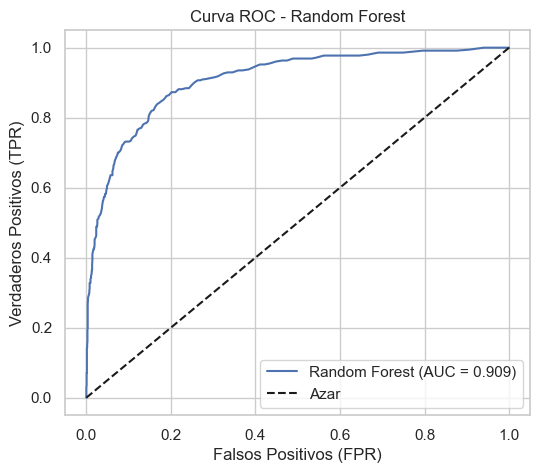

In [52]:
from sklearn.metrics import roc_curve

#probabilidades para clase positiva
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]

#cálculo de ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Azar')
plt.title('Curva ROC - Random Forest')
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.legend()
plt.show()


In [53]:
"""la curva ROC y el AUC son herramientas útiles para evaluar el rendimiento de modelos de clasificación, especialmente en contextos donde las clases están desbalanceadas. Un AUC cercano a 1 indica un modelo con buen poder discriminativo, mientras que un AUC cercano a 0.5 sugiere un modelo sin capacidad predictiva mejor que el azar.

En este caso, el modelo de Random Forest muestra un AUC de aproximadamente 0.77, lo que indica que tiene una capacidad razonable para distinguir entre clientes que abandonan y los que no. La curva ROC ilustra visualmente esta capacidad, mostrando la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de clasificación.  

"""



'la curva ROC y el AUC son herramientas útiles para evaluar el rendimiento de modelos de clasificación, especialmente en contextos donde las clases están desbalanceadas. Un AUC cercano a 1 indica un modelo con buen poder discriminativo, mientras que un AUC cercano a 0.5 sugiere un modelo sin capacidad predictiva mejor que el azar.\n\nEn este caso, el modelo de Random Forest muestra un AUC de aproximadamente 0.77, lo que indica que tiene una capacidad razonable para distinguir entre clientes que abandonan y los que no. La curva ROC ilustra visualmente esta capacidad, mostrando la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a diferentes umbrales de clasificación.  \n\n'

### 3.2.2 Modelo Regresión Logística

In [54]:
#entrenamos el modelo
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train, y_train)

#predicciones
y_pred = modelo_lr.predict(X_test)

#evaluación del modelo
print("🔹 Exactitud (accuracy):", round(accuracy_score(y_test, y_pred), 3))
print("\n🔹 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n🔹 Reporte de clasificación:")
print(classification_report(y_test, y_pred))


🔹 Exactitud (accuracy): 0.865

🔹 Matriz de confusión:
[[1475   62]
 [ 193  161]]

🔹 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1537
           1       0.72      0.45      0.56       354

    accuracy                           0.87      1891
   macro avg       0.80      0.71      0.74      1891
weighted avg       0.85      0.87      0.85      1891



### 3.2.3 Modelo XGBoost

In [55]:
#entrenamiento del modelo
modelo_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

modelo_xgb.fit(X_train, y_train)

#predicciones
y_pred_xgb = modelo_xgb.predict(X_test)
y_prob_xgb = modelo_xgb.predict_proba(X_test)[:, 1]

#evaluación
print("🔹 Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 3))
print("🔹 AUC:", round(roc_auc_score(y_test, y_prob_xgb), 3))
print("\n🔹 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_xgb))


c:\pinokio\bin\miniconda\lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Accuracy: 0.906
🔹 AUC: 0.938

🔹 Matriz de confusión:
[[1489   48]
 [ 129  225]]


*** priorizar recall ***

balancear  o modificar las metricas para ajsutar balance 

maximizar f1score.

metricas dadas a nacho depues del balanceo en xgboost

 'Accuracy': 0.9098,
 'Precision': 0.7055,
 'Recall': 0.5088,
 'F1-score': 0.5913,
 'AUC': 0.9029,
 'Umbral': 0.5}

revisar mas tarde

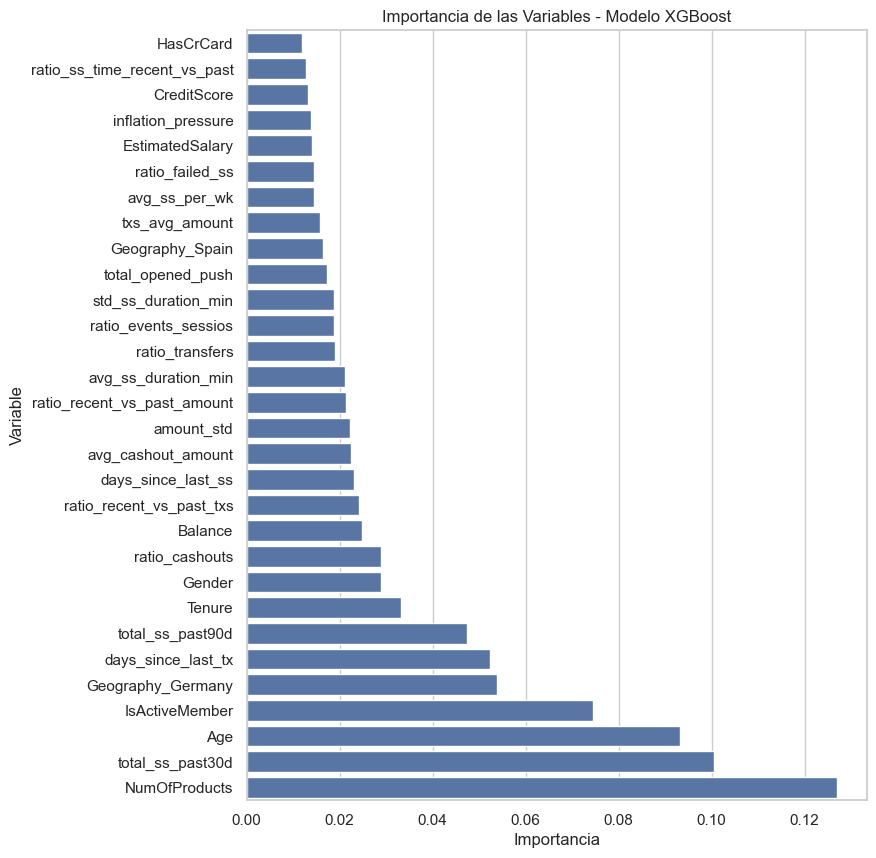

In [56]:

# --- Importancia de características ---
importancias = pd.Series(modelo_xgb.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 10))
sns.barplot(x=importancias, y=importancias.index)
plt.title('Importancia de las Variables - Modelo XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

revisar documentacion imblearn 

import imblearn
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X_train, y_train)

Train Test Split -> Escalar -> Balancear (REGLA DE ORO)

Data drift ? revisar


frid search, hiperparametros, cuantas muestras se requieren para la division de una rama ?
grid search, deteremina lugar de busqueda, maxima y minima muestras de division,
cross validation stratify, estratificacion de validacion cruzada

se divide las partes ejemplo en 5 obtiene scores entre usar 4 y validar con 1 

revisar series temporales


Ignacio Majo
9:06 p.m.
{'Model': 'PyTorch NN',
 'Dataset': 'X_t',
 'Accuracy': 0.8826,
 'Precision': 0.5314,
 'Recall': 0.7124,
 'F1-score': 0.6087,
 'AUC': 0.9022,
 'Umbral': 0.5}

Ignacio Majo
9:09 p.m.
StratifiedCrossValidation
Ignacio Majo
9:12 p.m.
LightBM
LightGBM

revisar el script